# Introduction:

Imagine a world where healthcare professionals could predict the onset of a life-threatening condition, septic shock, before it becomes critical. This project brings us closer to that reality by using the power of artificial intelligence to create a tool that can help doctors and nurses identify patients at risk.


# What is Sepectic Shock


--> Sepsis is a serious condition in which the body responds improperly to an infection. The infection-fighting processes turn on the body, causing the organs to work poorly. Sepsis may progress to septic shock. This is a dramatic drop in blood pressure that can damage the lungs, kidneys, liver and other organs. When the damage is severe, it can lead to mortality.

--> Sepsis can progress to septic shock when certain changes in the circulatory system, the body's cells and how the body uses energy become more abnormal. Septic shock is more likely to cause death than sepsis is.

--> Sepsis is a clinical syndrome of life-threatening organ dysfunction caused by a dysregulated response to infection. In septic shock, there is critical reduction in tissue perfusion; acute failure of multiple organs, including the lungs, kidneys, and liver, can occur.

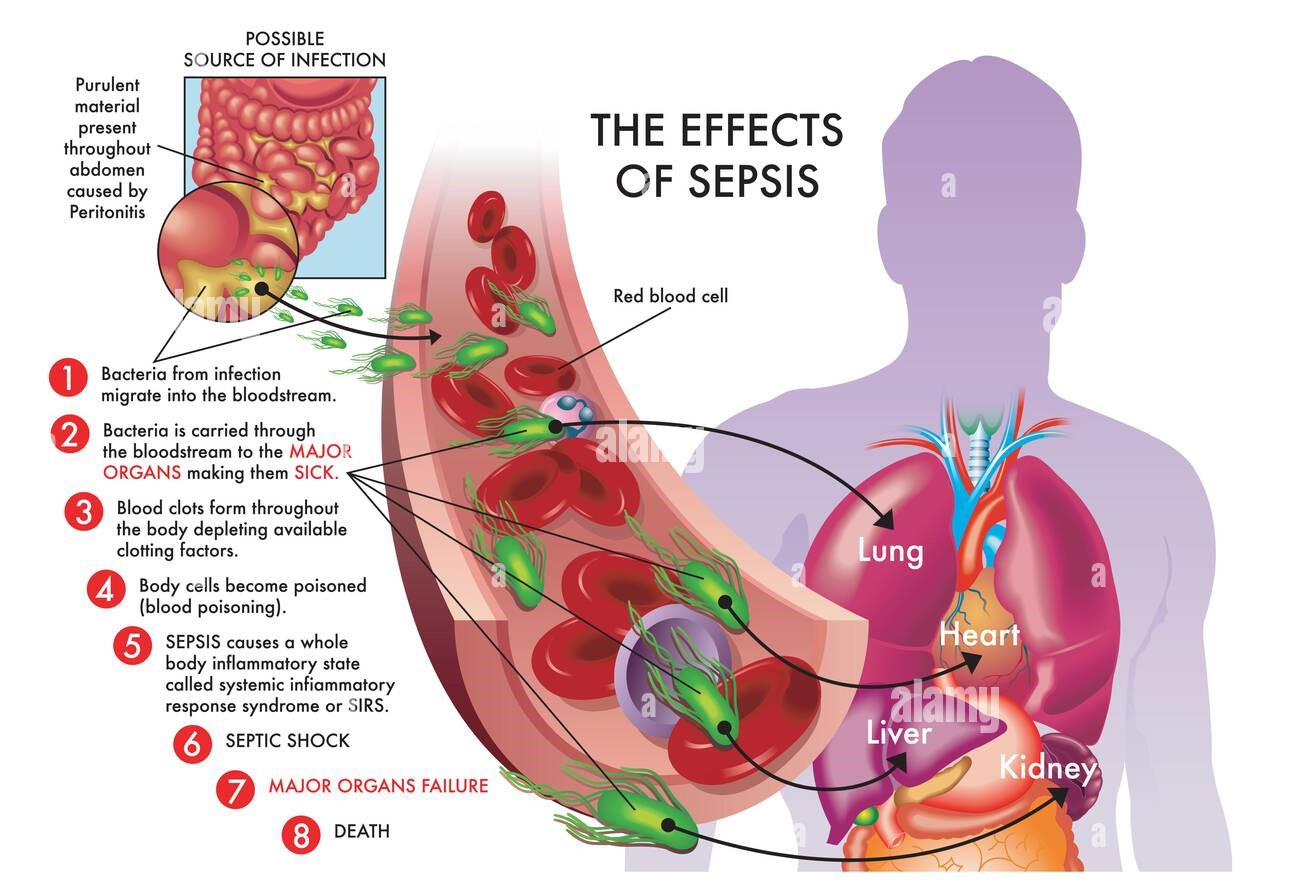

# About the Dataset:

Our project uses a vast collection of data from patients, including information like age, vital signs, and medical history. This data provides crucial insights into a patient's health and can help us spot signs of septic shock early on. By carefully analyzing this data and using machine learning techniques, we aim to build a model that can assist healthcare professionals in making quicker and more accurate decisions when treating patients.

Through this project, we will explore different methods and metrics to create the best possible predictive model. Our goal is to develop a tool that can help healthcare providers identify patients at risk of septic shock, allowing for faster intervention and potentially saving lives.


In [ ]:
# importing nessary libraries

In [ ]:
from io import IncrementalNewlineDecoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [ ]:
pd.set_option("display.max_columns",200)

In [ ]:
pd.set_option("display.max_rows",200)

In [ ]:
df=pd.read_csv("sepsis_status.csv")
dictionary =pd.read_csv("Parameter _detail_Dictionary.csv")

In [ ]:
df.head()

encounter_id  patient_id  hospital_id  septic_shock   age    bmi  \
0         66154       25312          118             0  68.0  22.73   
1        114252       59342           81             0  77.0  27.42   
2        119783       50777          118             0  25.0  31.95   
3         79267       46918          118             0  81.0  22.64   
4         92056       34377           33             0  19.0    NaN   

   elective_surgery  ethnicity gender  height hospital_admit_source  \
0                 0  Caucasian      M   180.3                 Floor   
1                 0  Caucasian      F   160.0                 Floor   
2                 0  Caucasian      F   172.7  Emergency Department   
3                 1  Caucasian      F   165.1        Operating Room   
4                 0  Caucasian      M   188.0                   NaN   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0                      Floor      92         admit         CTICU   
1                      Floor      90         admit  Med-Surg ICU   
2       Accident & Emergency      93         admit  Med-Surg ICU   
3  Operating Room / Recovery      92         admit         CTICU   
4       Accident & Emergency      91         admit  Med-Surg ICU   

   pre_icu_los_days  readmission_status  weight  albumin_apache  \
0          0.541667                   0    73.9             2.3   
1          0.927778                   0    70.2             NaN   
2          0.000694                   0    95.3             NaN   
3          0.000694                   0    61.7             NaN   
4          0.073611                   0     NaN             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                      0         0.0   
1               108.0               203.01                      0         0.0   
2               122.0               703.03                      0         0.0   
3               203.0              1206.03                      1         0.0   
4               119.0               601.01                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0               0.4        31.0               2.51          NaN   
1               NaN         9.0               0.56          1.0   
2               NaN         NaN                NaN          NaN   
3               NaN         NaN                NaN          0.6   
4               NaN         NaN                NaN          NaN   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0               27.4               0.0   
1           145.0              120.0               36.9               0.0   
2             NaN              102.0                NaN               0.0   
3           185.0              114.0               25.9               1.0   
4             NaN               60.0                NaN               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0           NaN                  NaN          NaN        NaN   
1        46.0          37.0                 37.0         51.0       7.45   
2        68.0           NaN                  NaN          NaN        NaN   
3        60.0          30.0                 30.0        142.0       7.39   
4       103.0           NaN                  NaN          NaN        NaN   

   resprate_apache  sodium_apache  temp_apache  urineoutpu

In [ ]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'septic_shock', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

In [ ]:
dictionary.head()

Category  Variable Name Unit of Measure Data Type  \
0   identifier   encounter_id            None   integer   
1   identifier    hospital_id            None   integer   
2   identifier     patient_id            None   integer   
3  demographic  Sepsis_status            None    binary   
4  demographic            age           Years   numeric   

                                         Description Example  
0  Unique identifier associated with a patient un...    None  
1       Unique identifier associated with a hospital    None  
2        Unique identifier associated with a patient    None  
3  Whether the patient having sepsis during this ...       0  
4           The age of the patient on unit admission    None

In [ ]:
icu_df=df.copy()

In [ ]:
icu_df.head()

encounter_id  patient_id  hospital_id  septic_shock   age    bmi  \
0         66154       25312          118             0  68.0  22.73   
1        114252       59342           81             0  77.0  27.42   
2        119783       50777          118             0  25.0  31.95   
3         79267       46918          118             0  81.0  22.64   
4         92056       34377           33             0  19.0    NaN   

   elective_surgery  ethnicity gender  height hospital_admit_source  \
0                 0  Caucasian      M   180.3                 Floor   
1                 0  Caucasian      F   160.0                 Floor   
2                 0  Caucasian      F   172.7  Emergency Department   
3                 1  Caucasian      F   165.1        Operating Room   
4                 0  Caucasian      M   188.0                   NaN   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0                      Floor      92         admit         CTICU   
1                      Floor      90         admit  Med-Surg ICU   
2       Accident & Emergency      93         admit  Med-Surg ICU   
3  Operating Room / Recovery      92         admit         CTICU   
4       Accident & Emergency      91         admit  Med-Surg ICU   

   pre_icu_los_days  readmission_status  weight  albumin_apache  \
0          0.541667                   0    73.9             2.3   
1          0.927778                   0    70.2             NaN   
2          0.000694                   0    95.3             NaN   
3          0.000694                   0    61.7             NaN   
4          0.073611                   0     NaN             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                      0         0.0   
1               108.0               203.01                      0         0.0   
2               122.0               703.03                      0         0.0   
3               203.0              1206.03                      1         0.0   
4               119.0               601.01                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0               0.4        31.0               2.51          NaN   
1               NaN         9.0               0.56          1.0   
2               NaN         NaN                NaN          NaN   
3               NaN         NaN                NaN          0.6   
4               NaN         NaN                NaN          NaN   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0               27.4               0.0   
1           145.0              120.0               36.9               0.0   
2             NaN              102.0                NaN               0.0   
3           185.0              114.0               25.9               1.0   
4             NaN               60.0                NaN               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0           NaN                  NaN          NaN        NaN   
1        46.0          37.0                 37.0         51.0       7.45   
2        68.0           NaN                  NaN          NaN        NaN   
3        60.0          30.0                 30.0        142.0       7.39   
4       103.0           NaN                  NaN          NaN        NaN   

   resprate_apache  sodium_apache  temp_apache  urineoutpu

In [ ]:
icu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [ ]:
icu_df['septic_shock'].value_counts()

0    83798
1     7915
Name: septic_shock, dtype: int64

In [ ]:
icu_df['septic_shock'].value_counts(normalize=True)

0    0.913698
1    0.086302
Name: septic_shock, dtype: float64

In [ ]:
# Highly imbalance data

In [ ]:
def selectCategory(df,category):
  return df[df.Category==category]

In [ ]:
cols=selectCategory(dictionary,'GOSSIS example prediction')

In [ ]:
cols

Category Variable Name Unit of Measure Data Type  \
187  GOSSIS example prediction          pred            None   numeric   

                                           Description   Example  
187  Example mortality prediction, shared as a 'bas...  0.000921

In [ ]:
cols=selectCategory(dictionary,'demographic')

In [ ]:
cols

Category          Variable Name     Unit of Measure Data Type  \
3   demographic          Sepsis_status                None    binary   
4   demographic                    age               Years   numeric   
5   demographic                    bmi  kilograms/metres^2    string   
6   demographic       elective_surgery                None    binary   
7   demographic              ethnicity                None    string   
8   demographic                 gender                None    string   
9   demographic                 height         centimetres   numeric   
10  demographic  hospital_admit_source                None    string   
11  demographic       icu_admit_source                None    string   
12  demographic         icu_admit_type                None    string   
13  demographic                 icu_id                None   integer   
14  demographic          icu_stay_type                None    string   
15  demographic               icu_type                None    string   
16  demographic       pre_icu_los_days                Days   numeric   
17  demographic     readmission_status                None    binary   
18  demographic                 weight           kilograms   numeric   

                                          Description           Example  
3   Whether the patient having sepsis during this ...                 0  
4            The age of the patient on unit admission              None  
5   The body mass index of the person on unit admi...              21.5  
6   Whether the patient was admitted to the hospit...                 0  
7   The common national or cultural tradition whic...         Caucasian  
8                  The genotypical sex of the patient                 F  
9          The height of the person on unit admission               180  
10  The location of the patient prior to being adm...              Home  
11  The location of the patient prior to being adm...    Operating room  
12         The type of unit admission for the patient    Cardiothoracic  
13  A unique identifier for the unit to which the ...              None  
14                                                NaN              None  
15  A classification which indicates the type of c...  Neurological ICU  
16  The length of stay of the patient between hosp...               3.5  
17  Whether the current unit stay is the second (o...                 0  
18  The weight (body mass) of the person on unit a...                80

In [ ]:
# Preprocessing: Finding missing value
icu_df.isnull().sum()

encounter_id                          0
patient_id                            0
hospital_id                           0
septic_shock                          0
age                                4228
bmi                                3429
elective_surgery                      0
ethnicity                          1395
gender                               25
height                             1334
hospital_admit_source             21409
icu_admit_source                    112
icu_id                                0
icu_stay_type                         0
icu_type                              0
pre_icu_los_days                      0
readmission_status                    0
weight                             2720
albumin_apache                    54379
apache_2_diagnosis                 1662
apache_3j_diagnosis                1101
apache_post_operative                 0
arf_apache                          715
bilirubin_apache                  58134
bun_apache                        19262


In [ ]:
icu_df.isnull().sum().sort_values(ascending=False)

h1_bilirubin_min                  84619
h1_bilirubin_max                  84619
h1_lactate_max                    84369
h1_lactate_min                    84369
h1_albumin_max                    83824
h1_albumin_min                    83824
h1_pao2fio2ratio_min              80195
h1_pao2fio2ratio_max              80195
h1_arterial_ph_max                76424
h1_arterial_ph_min                76424
h1_hco3_max                       76094
h1_hco3_min                       76094
h1_arterial_pco2_min              75959
h1_arterial_pco2_max              75959
h1_wbc_max                        75953
h1_wbc_min                        75953
h1_arterial_po2_max               75945
h1_arterial_po2_min               75945
h1_calcium_max                    75863
h1_calcium_min                    75863
h1_platelets_max                  75673
h1_platelets_min                  75673
h1_bun_max                        75091
h1_bun_min                        75091
h1_creatinine_max                 74957


In [ ]:
high_null=icu_df.isnull().sum()/len(icu_df)

In [ ]:
high_null.sort_values(ascending=False)

h1_bilirubin_min                  0.922650
h1_bilirubin_max                  0.922650
h1_lactate_max                    0.919924
h1_lactate_min                    0.919924
h1_albumin_max                    0.913982
h1_albumin_min                    0.913982
h1_pao2fio2ratio_min              0.874413
h1_pao2fio2ratio_max              0.874413
h1_arterial_ph_max                0.833295
h1_arterial_ph_min                0.833295
h1_hco3_max                       0.829697
h1_hco3_min                       0.829697
h1_arterial_pco2_min              0.828225
h1_arterial_pco2_max              0.828225
h1_wbc_max                        0.828160
h1_wbc_min                        0.828160
h1_arterial_po2_max               0.828072
h1_arterial_po2_min               0.828072
h1_calcium_max                    0.827178
h1_calcium_min                    0.827178
h1_platelets_max                  0.825107
h1_platelets_min                  0.825107
h1_bun_max                        0.818761
h1_bun_min 

In [ ]:
# we have only two categories of missing value---more than 50% or less than 25%

In [ ]:
# we cannot handle missing values for healthcare critical condition

In [ ]:
high_missing=high_null[high_null>0.50].index

In [ ]:
high_missing

Index(['albumin_apache', 'bilirubin_apache', 'fio2_apache', 'paco2_apache',
       'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'urineoutput_apache',
       'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_max',
       'd1_sysbp_invasive_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'd1_albumin_max',
       'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_inr_max',
       'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'h1_albumin_max',
       'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max',
       'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max',
       'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max',
       'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min',
       'h1_hematocrit_max', 'h1_hematocri

In [ ]:
len(high_missing)

74

In [ ]:
# Drop the column having more than 50% missing values

In [ ]:
icu=icu_df.drop(high_missing,axis=1)

In [ ]:
icu.shape

(91713, 112)

In [ ]:
icu_df.shape

(91713, 186)

In [ ]:
df1=icu.dropna()

In [ ]:
df1.shape

(27795, 112)

In [ ]:
df1.isnull().sum().sum()

0

In [ ]:
df1.head()

encounter_id  patient_id  hospital_id  septic_shock   age        bmi  \
0          66154       25312          118             0  68.0  22.730000   
1         114252       59342           81             0  77.0  27.420000   
5          33181       74489           83             0  67.0  27.560000   
17         22471      112115          118             0  46.0  25.845717   
23         95460      120539          118             0  87.0  21.963763   

    elective_surgery  ethnicity gender  height hospital_admit_source  \
0                  0  Caucasian      M   180.3                 Floor   
1                  0  Caucasian      F   160.0                 Floor   
5                  0  Caucasian      M   190.5          Direct Admit   
17                 0   Hispanic      M   167.6  Emergency Department   
23                 0  Caucasian      M   180.3                 Floor   

        icu_admit_source  icu_id icu_stay_type      icu_type  \
0                  Floor      92         admit         CTICU   
1                  Floor      90         admit  Med-Surg ICU   
5   Accident & Emergency      95         admit  Med-Surg ICU   
17  Accident & Emergency      92         admit         CTICU   
23                 Floor      97         admit          MICU   

    pre_icu_los_days  readmission_status  weight  apache_2_diagnosis  \
0           0.541667                   0    73.9               113.0   
1           0.927778                   0    70.2               108.0   
5           0.000694                   0   100.0               301.0   
17          0.000000                   0    72.6               108.0   
23          5.046528                   0    71.4               113.0   

    apache_3j_diagnosis  apache_post_operative  arf_apache  bun_apache  \
0                502.01                      0         0.0        31.0   
1                203.01                      0         0.0         9.0   
5                403.01                      0         0.0        13.0   
17               203.01                      0         0.0        15.0   
23               501.05                      0         0.0        13.0   

    creatinine_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0                2.51              3.0               6.0                0.0   
1                0.56              1.0               3.0                0.0   
5                0.71              4.0               6.0                0.0   
17               1.00              1.0               4.0                0.0   
23               0.94              3.0               6.0                0.0   

    gcs_verbal_apache  glucose_apache  heart_rate_apache  hematocrit_apache  \
0                 4.0           168.0              118.0               27.4   
1                 1.0           145.0              120.0               36.9   
5                 5.0           156.0              113.0               44.2   
17                1.0           143.0              114.0               44.2   
23                1.0           105.0               99.0               28.9   

    intubated_apache  map_apache  resprate_apache  sodium_apache  temp_apache  \
0                0.0        40.0             36.0          134.0         39.3   
1                0.0        46.0             33.0          145.0         35.1   
5                0.0       130.0             35.0          137.0         36.6   
17               1.0       113.0             34.0          132.0         36.4   
23               0.0       133.0             33.0          146.0         36.3   

    ventilated_apache  wbc_apache  d1_diasbp_max  d1_diasbp_min  \
0                 0.0        14.1           68.0           37.0   
1                 1.0        12.7           95.0           31.0   
5                 0.0        10.9          100.0           61.0   
17                1.0         9.7           89.0           61.0   
23                1.0         9.9           88.0           65.0   

    d1_dias

In [ ]:
df.dtypes

encounter_id                        int64
patient_id                          int64
hospital_id                         int64
septic_shock                        int64
age                               float64
bmi                               float64
elective_surgery                    int64
ethnicity                          object
gender                             object
height                            float64
hospital_admit_source              object
icu_admit_source                   object
icu_id                              int64
icu_stay_type                      object
icu_type                           object
pre_icu_los_days                  float64
readmission_status                  int64
weight                            float64
albumin_apache                    float64
apache_2_diagnosis                float64
apache_3j_diagnosis               float64
apache_post_operative               int64
arf_apache                        float64
bilirubin_apache                  

In [ ]:
# lets drop insignificant columns

In [ ]:
cols_to_drop=["encounter_id","patient_id","hospital_admit_source","icu_admit_source","icu_id","icu_stay_type"]

In [ ]:
df1=df1.drop(cols_to_drop,axis=1)

In [ ]:
df1.shape

(27795, 106)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27795 entries, 0 to 91709
Columns: 106 entries, hospital_id to apache_2_bodysystem
dtypes: float64(96), int64(5), object(5)
memory usage: 22.7+ MB


Encoding Technique

In [ ]:
# in healthcare projects outliers seams to be important

In [ ]:
# Encoding technique

In [ ]:
object_columns=df1.select_dtypes(include='object').columns

In [ ]:
object_columns

Index(['ethnicity', 'gender', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [ ]:
df1_final=pd.get_dummies(df1,columns=object_columns,drop_first=True)

In [ ]:
df1_final.shape

(27795, 133)

In [ ]:
df1_final.head()

hospital_id  septic_shock   age        bmi  elective_surgery  height  \
0           118             0  68.0  22.730000                 0   180.3   
1            81             0  77.0  27.420000                 0   160.0   
5            83             0  67.0  27.560000                 0   190.5   
17          118             0  46.0  25.845717                 0   167.6   
23          118             0  87.0  21.963763                 0   180.3   

    pre_icu_los_days  readmission_status  weight  apache_2_diagnosis  \
0           0.541667                   0    73.9               113.0   
1           0.927778                   0    70.2               108.0   
5           0.000694                   0   100.0               301.0   
17          0.000000                   0    72.6               108.0   
23          5.046528                   0    71.4               113.0   

    apache_3j_diagnosis  apache_post_operative  arf_apache  bun_apache  \
0                502.01                      0         0.0        31.0   
1                203.01                      0         0.0         9.0   
5                403.01                      0         0.0        13.0   
17               203.01                      0         0.0        15.0   
23               501.05                      0         0.0        13.0   

    creatinine_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0                2.51              3.0               6.0                0.0   
1                0.56              1.0               3.0                0.0   
5                0.71              4.0               6.0                0.0   
17               1.00              1.0               4.0                0.0   
23               0.94              3.0               6.0                0.0   

    gcs_verbal_apache  glucose_apache  heart_rate_apache  hematocrit_apache  \
0                 4.0           168.0              118.0               27.4   
1                 1.0           145.0              120.0               36.9   
5                 5.0           156.0              113.0               44.2   
17                1.0           143.0              114.0               44.2   
23                1.0           105.0               99.0               28.9   

    intubated_apache  map_apache  resprate_apache  sodium_apache  temp_apache  \
0                0.0        40.0             36.0          134.0         39.3   
1                0.0        46.0             33.0          145.0         35.1   
5                0.0       130.0             35.0          137.0         36.6   
17               1.0       113.0             34.0          132.0         36.4   
23               0.0       133.0             33.0          146.0         36.3   

    ventilated_apache  wbc_apache  d1_diasbp_max  d1_diasbp_min  \
0                 0.0        14.1           68.0           37.0   
1                 1.0        12.7           95.0           31.0   
5                 0.0        10.9          100.0           61.0   
17                1.0         9.7           89.0           61.0   
23                1.0         9.9           88.0           65.0   

    d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  d1_heartrate_max  \
0                        68.0                       37.0             119.0   
1                        95.0                       31.0             118.0   
5                       100.0                       61.0             113.0   
17                       89.0                       61.0              98.0   
23                       88.0                       65.0             116.0   

    d1_heartrate_min  d1_mbp_max  d1_mbp_min  d1_mbp_noninvasive_max  \
0               72.0        89.0        46.0                    89.0   
1               72.0       120.0        38.0                   120.0   
5               83.0       127.0        80.0                   127.0   
17              64.0       113.0        76.0                   113.0   


In [ ]:
cols=df1_final.columns

In [ ]:
cols

Index(['hospital_id', 'septic_shock', 'age', 'bmi', 'elective_surgery',
       'height', 'pre_icu_los_days', 'readmission_status', 'weight',
       'apache_2_diagnosis',
       ...
       'apache_3j_bodysystem_Trauma', 'apache_2_bodysystem_Gastrointestinal',
       'apache_2_bodysystem_Haematologic', 'apache_2_bodysystem_Metabolic',
       'apache_2_bodysystem_Neurologic',
       'apache_2_bodysystem_Renal/Genitourinary',
       'apache_2_bodysystem_Respiratory', 'apache_2_bodysystem_Trauma',
       'apache_2_bodysystem_Undefined Diagnoses',
       'apache_2_bodysystem_Undefined diagnoses'],
      dtype='object', length=133)

In [ ]:
# split the data into dependent and independent varaibles

In [ ]:
x=df1_final.drop("septic_shock",axis=1)

In [ ]:
y=df1_final['septic_shock']

In [ ]:
y.value_counts(normalize=True)

0    0.908761
1    0.091239
Name: septic_shock, dtype: float64

In [ ]:
# Must check if any column has only one variables

In [ ]:
# finding the unique variable columns

In [ ]:
one_unique=x.apply(pd.Series.nunique)
one_unique

hospital_id                                    119
age                                             74
bmi                                          16993
elective_surgery                                 2
height                                         271
pre_icu_los_days                              4637
readmission_status                               1
weight                                        2447
apache_2_diagnosis                              44
apache_3j_diagnosis                            363
apache_post_operative                            2
arf_apache                                       2
bun_apache                                     195
creatinine_apache                              938
gcs_eyes_apache                                  4
gcs_motor_apache                                 6
gcs_unable_apache                                1
gcs_verbal_apache                                5
glucose_apache                                 534
heart_rate_apache              

In [ ]:
const_cols=one_unique[one_unique==1].index

In [ ]:
const_cols

Index(['readmission_status', 'gcs_unable_apache'], dtype='object')

In [ ]:
x['readmission_status'].value_counts()

0    27795
Name: readmission_status, dtype: int64

In [ ]:
x['gcs_unable_apache'].value_counts()

0.0    27795
Name: gcs_unable_apache, dtype: int64

In [ ]:
x.drop(['readmission_status','gcs_unable_apache'],axis=1,inplace=True)

In [ ]:
x.shape

(27795, 130)

In [ ]:
# lets find is there any multiclinearity or not

In [ ]:
# Pearson correlation coefficient for normally distributed data
# for non linearity we can go with the spearman rank coefficient

In [ ]:
corr_matrix=x.corr(method='spearman').abs()

In [ ]:
corr_matrix

hospital_id       age       bmi  \
hospital_id                                   1.000000  0.023046  0.014703   
age                                           0.023046  1.000000  0.102192   
bmi                                           0.014703  0.102192  1.000000   
elective_surgery                              0.049647  0.054517  0.028267   
height                                        0.033495  0.123064  0.012171   
pre_icu_los_days                              0.000866  0.090182  0.009129   
weight                                        0.027434  0.148448  0.880394   
apache_2_diagnosis                            0.005550  0.035333  0.008191   
apache_3j_diagnosis                           0.017585  0.088868  0.033975   
apache_post_operative                         0.047964  0.045835  0.030399   
arf_apache                                    0.000385  0.019419  0.004010   
bun_apache                                    0.008449  0.341147  0.081152   
creatinine_apache                             0.013198  0.206540  0.155061   
gcs_eyes_apache                               0.026168  0.042142  0.020329   
gcs_motor_apache                              0.013921  0.035899  0.039773   
gcs_verbal_apache                             0.009046  0.021180  0.053836   
glucose_apache                                0.007863  0.045058  0.150083   
heart_rate_apache                             0.001770  0.161223  0.042985   
hematocrit_apache                             0.000898  0.121132  0.117249   
intubated_apache                              0.016270  0.008750  0.036228   
map_apache                                    0.012759  0.076555  0.053504   
resprate_apache                               0.054585  0.031430  0.002553   
sodium_apache                                 0.003439  0.042749  0.021054   
temp_apache                                   0.059842  0.113531  0.037492   
ventilated_apache                             0.034473  0.006724  0.069622   
wbc_apache                                    0.019394  0.011917  0.054315   
d1_diasbp_max                                 0.012832  0.073898  0.054502   
d1_diasbp_min                                 0.015559  0.251466  0.008948   
d1_diasbp_noninvasive_max                     0.012855  0.073416  0.054250   
d1_diasbp_noninvasive_min                     0.015755  0.251180  0.009203   
d1_heartrate_max                              0.019620  0.154576  0.043471   
d1_heartrate_min                              0.014032  0.151041  0.011664   
d1_mbp_max                                    0.005818  0.014250  0.072978   
d1_mbp_min                                    0.030437  0.172263  0.020790   
d1_mbp_noninvasive_max                        0.006060  0.014217  0.072847   
d1_mbp_noninvasive_min                        0.030315  0.172481  0.020615   
d1_resprate_max                               0.014507  0.031633  0.022875   
d1_resprate_min                               0.083630  0.051329  0.000331   
d1_spo2_max                                   0.025829  0.029938  0.124595   
d1_spo2_min                                   0.033792  0.113899  0.088231   
d1_sysbp_max                                  0.009972  0.104631  0.095507   
d1_sysbp_min                                  0.029607  0.075637  0.059089   
d1_sysbp_noninvasive_max                      0.009554  0.104315  0.095253   
d1_sysbp_noninvasive_min                      0.029469  0.075678  0.058879   
d1_temp_max                                   0.034897  0.097403  0.019230   
d1_temp_min                                   0.080696  0.116708  0.036794   
h1_diasbp_max                                 0.019332  0.168123  0.032363   
h1_diasbp_min                                 0.025912  0.216529  0.001410   
h1_diasbp_noninvasive_max                     0.019883  0.166813  0.030786   
h1_diasbp_noninvasive_min                     0.022735  0.216744  0.000757   
h1_heartrate_max                              0.004763  0.178289 

<Axes: >

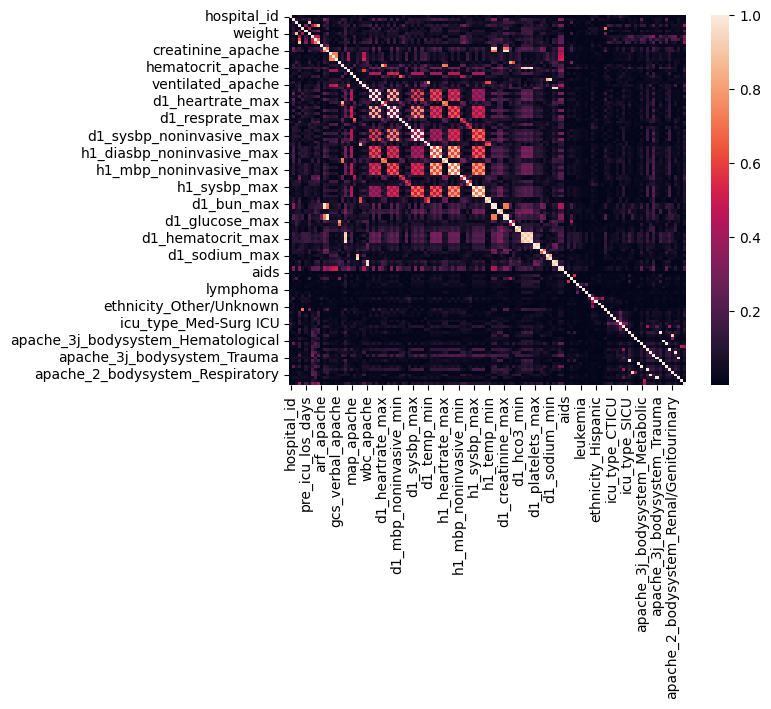

In [ ]:
sns.heatmap(corr_matrix)

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
# Initialize a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns

# Calculate VIF for each variable
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Print the VIF values
print(vif_data)

                                      Variable           VIF
0                                  hospital_id  4.169599e+00
1                                          age  2.378003e+01
2                                          bmi  3.544967e+02
3                             elective_surgery  8.495564e+00
4                                       height  1.990583e+03
5                             pre_icu_los_days  1.213666e+00
6                                       weight  3.841440e+02
7                           apache_2_diagnosis  9.806825e+00
8                          apache_3j_diagnosis  9.210180e+02
9                        apache_post_operative  4.199867e+02
10                                  arf_apache  1.671929e+00
11                                  bun_apache  1.230955e+02
12                           creatinine_apache  2.528842e+02
13                             gcs_eyes_apache  5.147822e+01
14                            gcs_motor_apache  5.565332e+01
15                      

In [ ]:
correlation_threshold = 0.7  # Adjust as needed
high_correlations = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= correlation_threshold:
            high_correlations.append((corr_matrix.columns[i], corr_matrix.columns[j]))

print("Highly Correlated Variables:")
for var1, var2 in high_correlations:
    print(f"{var1} and {var2}: {corr_matrix[var1][var2]}")


Highly Correlated Variables:
bmi and weight: 0.8803943797345889
elective_surgery and apache_post_operative: 0.92069751926463
height and gender_M: 0.7144029842802491
apache_3j_diagnosis and apache_post_operative: 0.7146516355737357
bun_apache and creatinine_apache: 0.7267064967144025
bun_apache and d1_bun_max: 0.9899267295668863
bun_apache and d1_bun_min: 0.9699642380176785
bun_apache and d1_creatinine_max: 0.7361499886086482
bun_apache and d1_creatinine_min: 0.7172020108928159
creatinine_apache and d1_bun_max: 0.7257028762956003
creatinine_apache and d1_bun_min: 0.7196051002756333
creatinine_apache and d1_creatinine_max: 0.9785761642667138
creatinine_apache and d1_creatinine_min: 0.9814584160715091
gcs_eyes_apache and gcs_motor_apache: 0.7399784430082891
gcs_eyes_apache and gcs_verbal_apache: 0.7295898756055411
gcs_motor_apache and gcs_verbal_apache: 0.7444135984193254
glucose_apache and d1_glucose_max: 0.8191578352998446
heart_rate_apache and d1_heartrate_max: 0.871626077574489
heart_

In [ ]:
# method 3# how to find the degree of corr between the columns--- how to find multi collinearity

In [ ]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

In [ ]:
# bench mark 0.9
high_corr=[col for col in upper.columns if any(upper[col]>=0.9)]

In [ ]:
high_corr

['apache_post_operative',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_hemaglobin_min',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_platelets_min',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'apache_4a_icu_sepsis_prob',
 'apache_2_bodysystem_Gastrointestinal',
 'apache_2_bodysystem_Haematologic',
 'apache_2_bodysystem_Metabolic',
 'apache_2_bodysystem_Neurologic',
 'apache_2_bodysystem_Renal/Genitourinary',
 'apache_2_bodysystem_Respiratory',
 'apache_2_bodysystem_Trauma']

In [ ]:
len(high_corr)

32

In [ ]:
x=x.drop(high_corr,axis=1)

In [ ]:
x.shape

(27795, 98)

In [ ]:
y.shape

(27795,)

In [ ]:
# confidence interval

In [ ]:
import scipy.stats as st

In [ ]:
st.norm.interval(alpha=0.95,loc=np.mean(x['age']),scale=st.sem(x['age']))

(62.471691549087915, 62.85962703339094)

In [ ]:
st.norm.interval(alpha=0.95,loc=np.mean(x['height']),scale=st.sem(x['height']))

(169.85262474240264, 170.1042322462644)

In [ ]:
# Q-Q plot is also used to check normal distribution

In [ ]:
from statsmodels.graphics.gofplots import  qqplot

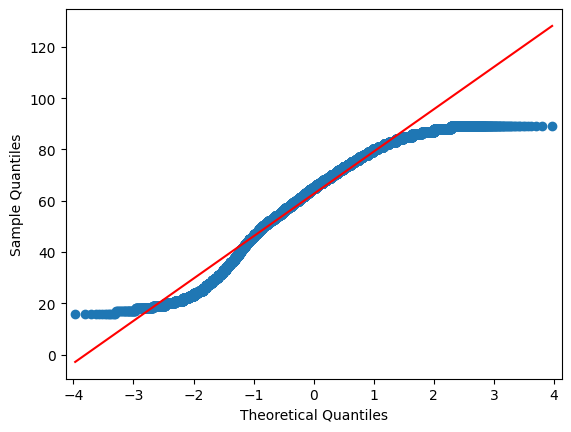

In [ ]:
qqplot(x['age'],line='s')
plt.show()

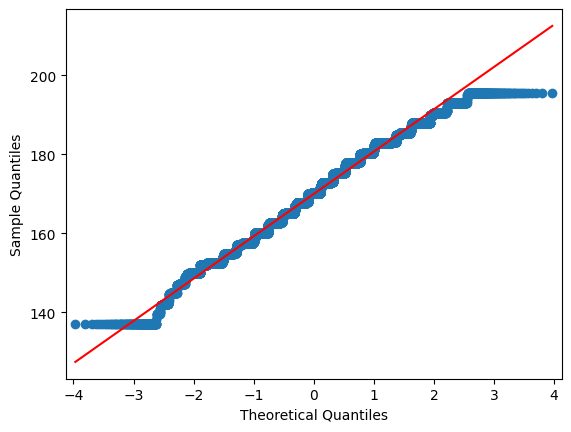

In [ ]:
qqplot(x['height'],line='s')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

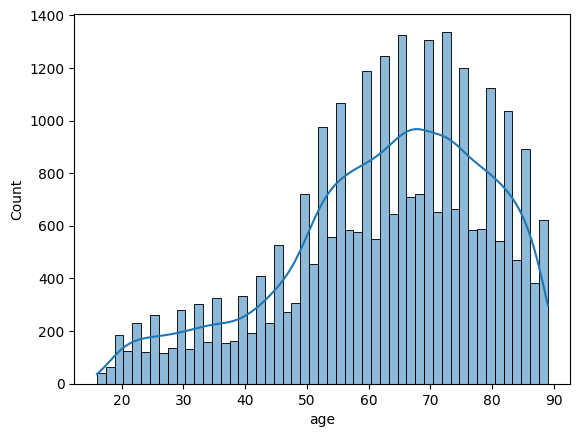

In [ ]:
sns.histplot(x=x['age'],kde=True)

<Axes: xlabel='height', ylabel='Count'>

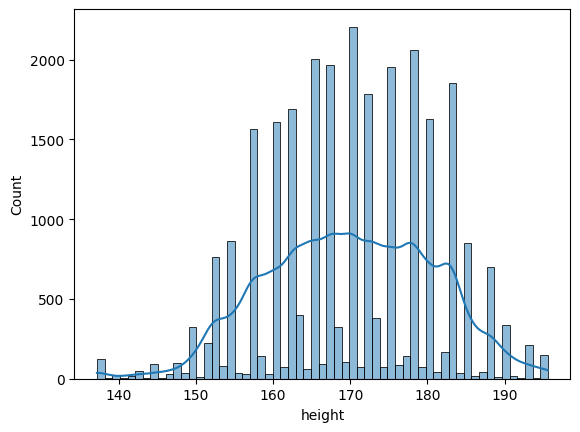

In [ ]:
sns.histplot(x=x['height'],kde=True)

In [ ]:
st.shapiro(x.age)

ShapiroResult(statistic=0.9591078758239746, pvalue=0.0)

In [ ]:
# p value is less than 0.05 we are able to reject the null hypothesis

# H0:The age column is normally distributed
# H1:The age column is not normally distributed

In [ ]:
# conclusion: The age column is not normally distributed

In [ ]:
# select the best feature so that we can perform exploratory data analysis

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif

In [ ]:
bestfeatures=SelectKBest(score_func=mutual_info_classif)

In [ ]:
bestfeatures=bestfeatures.fit(x,y)

In [ ]:
bestfeatures

SelectKBest(score_func=<function mutual_info_classif at 0x7d882a154ee0>)

In [ ]:
dfscore=pd.DataFrame(bestfeatures.scores_)

In [ ]:
dfscore.head(20)

0
0   0.004206
1   0.004536
2   0.000000
3   0.007922
4   0.000000
5   0.005500
6   0.000122
7   0.033882
8   0.038564
9   0.000000
10  0.020699
11  0.021666
12  0.030539
13  0.034448
14  0.027373
15  0.010153
16  0.013751
17  0.006586
18  0.017004
19  0.015880

In [ ]:
dfcolumns=pd.DataFrame(x.columns)

In [ ]:
# concatenating the two dataframe

In [ ]:
features_score=pd.concat([dfcolumns,dfscore],axis=1)

In [ ]:
features_score

0         0
0                                 hospital_id  0.004206
1                                         age  0.004536
2                                         bmi  0.000000
3                            elective_surgery  0.007922
4                                      height  0.000000
5                            pre_icu_los_days  0.005500
6                                      weight  0.000122
7                          apache_2_diagnosis  0.033882
8                         apache_3j_diagnosis  0.038564
9                                  arf_apache  0.000000
10                                 bun_apache  0.020699
11                          creatinine_apache  0.021666
12                            gcs_eyes_apache  0.030539
13                           gcs_motor_apache  0.034448
14                          gcs_verbal_apache  0.027373
15                             glucose_apache  0.010153
16                          heart_rate_apache  0.013751
17                          hematocrit_apache  0.006586
18                           intubated_apache  0.017004
19                                 map_apache  0.015880
20                            resprate_apache  0.008969
21                              sodium_apache  0.009089
22                                temp_apache  0.025287
23                          ventilated_apache  0.028781
24                                 wbc_apache  0.014523
25                              d1_diasbp_max  0.000067
26                              d1_diasbp_min  0.017664
27                           d1_heartrate_max  0.012989
28                           d1_heartrate_min  0.009875
29                                 d1_mbp_max  0.000257
30                                 d1_mbp_min  0.022088
31                            d1_resprate_max  0.006629
32                            d1_resprate_min  0.008552
33                                d1_spo2_max  0.008999
34                                d1_spo2_min  0.018958
35                               d1_sysbp_max  0.002994
36                               d1_sysbp_min  0.023646
37                                d1_temp_max  0.016621
38                                d1_temp_min  0.025272
39                              h1_diasbp_max  0.001364
40                              h1_diasbp_min  0.012770
41                           h1_heartrate_max  0.006394
42                           h1_heartrate_min  0.005161
43                                 h1_mbp_max  0.003051
44                                 h1_mbp_min  0.012635
45                            h1_resprate_max  0.008582
46                            h1_resprate_min  0.007932
47                                h1_spo2_max  0.007624
48                                h1_spo2_min  0.005827
49                               h1_sysbp_max  0.003222
50                               h1_sysbp_min  0.014360
51                                h1_temp_max  0.012927
52                                h1_temp_min  0.013708
53                             d1_calcium_max  0.006985
54                             d1_calcium_min  0.010645
55                             d1_glucose_max  0.004626
56                             d1_glucose_min  0.006267
57                                d1_hco3_max  0.017006
58                                d1_hco3_min  0.021923
59                          d1_hemaglobin_max  0.006093
60                           d1_platelets_max  0.006326
61                           d1_potassium_max  0.008111
62                           d1_potassium_min  0.009649
63                              d1_sodium_max  0.008431
64             apache_4a_hospital_sepsis_prob  0.086327
65                                       aids  0.000000
66                                  cirrhosis  0.003190
67                          diabetes_mellitus  0.000000
68                            hepatic_failure  0.000515
69                          immunosuppression  0.000375
70                                   leukemia  0.000000
71          

In [ ]:
features_score.columns=['Features','Score']
features_score

Features     Score
0                                 hospital_id  0.004206
1                                         age  0.004536
2                                         bmi  0.000000
3                            elective_surgery  0.007922
4                                      height  0.000000
5                            pre_icu_los_days  0.005500
6                                      weight  0.000122
7                          apache_2_diagnosis  0.033882
8                         apache_3j_diagnosis  0.038564
9                                  arf_apache  0.000000
10                                 bun_apache  0.020699
11                          creatinine_apache  0.021666
12                            gcs_eyes_apache  0.030539
13                           gcs_motor_apache  0.034448
14                          gcs_verbal_apache  0.027373
15                             glucose_apache  0.010153
16                          heart_rate_apache  0.013751
17                          hematocrit_apache  0.006586
18                           intubated_apache  0.017004
19                                 map_apache  0.015880
20                            resprate_apache  0.008969
21                              sodium_apache  0.009089
22                                temp_apache  0.025287
23                          ventilated_apache  0.028781
24                                 wbc_apache  0.014523
25                              d1_diasbp_max  0.000067
26                              d1_diasbp_min  0.017664
27                           d1_heartrate_max  0.012989
28                           d1_heartrate_min  0.009875
29                                 d1_mbp_max  0.000257
30                                 d1_mbp_min  0.022088
31                            d1_resprate_max  0.006629
32                            d1_resprate_min  0.008552
33                                d1_spo2_max  0.008999
34                                d1_spo2_min  0.018958
35                               d1_sysbp_max  0.002994
36                               d1_sysbp_min  0.023646
37                                d1_temp_max  0.016621
38                                d1_temp_min  0.025272
39                              h1_diasbp_max  0.001364
40                              h1_diasbp_min  0.012770
41                           h1_heartrate_max  0.006394
42                           h1_heartrate_min  0.005161
43                                 h1_mbp_max  0.003051
44                                 h1_mbp_min  0.012635
45                            h1_resprate_max  0.008582
46                            h1_resprate_min  0.007932
47                                h1_spo2_max  0.007624
48                                h1_spo2_min  0.005827
49                               h1_sysbp_max  0.003222
50                               h1_sysbp_min  0.014360
51                                h1_temp_max  0.012927
52                                h1_temp_min  0.013708
53                             d1_calcium_max  0.006985
54                             d1_calcium_min  0.010645
55                             d1_glucose_max  0.004626
56                             d1_glucose_min  0.006267
57                                d1_hco3_max  0.017006
58                                d1_hco3_min  0.021923
59                          d1_hemaglobin_max  0.006093
60                           d1_platelets_max  0.006326
61                           d1_potassium_max  0.008111
62                           d1_potassium_min  0.009649
63                              d1_sodium_max  0.008431
64             apache_4a_hospital_sepsis_prob  0.086327
65                                       aids  0.000000
66                                  cirrhosis  0.003190
67                          diabetes_mellitus  0.000000
68                            hepatic_failure  0.000515
69                          immunosuppression  0.000375
70                                   leukemia  0.000000
71   

In [ ]:
best_features=features_score.nlargest(20,"Score")

In [ ]:
# Best 20 Features
best_features

Features     Score
64  apache_4a_hospital_sepsis_prob  0.086327
8              apache_3j_diagnosis  0.038564
13                gcs_motor_apache  0.034448
7               apache_2_diagnosis  0.033882
12                 gcs_eyes_apache  0.030539
23               ventilated_apache  0.028781
14               gcs_verbal_apache  0.027373
22                     temp_apache  0.025287
38                     d1_temp_min  0.025272
36                    d1_sysbp_min  0.023646
30                      d1_mbp_min  0.022088
58                     d1_hco3_min  0.021923
11               creatinine_apache  0.021666
10                      bun_apache  0.020699
34                     d1_spo2_min  0.018958
26                   d1_diasbp_min  0.017664
57                     d1_hco3_max  0.017006
18                intubated_apache  0.017004
37                     d1_temp_max  0.016621
19                      map_apache  0.015880

In [ ]:
!pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 46.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 119.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 99.6 MB/s eta 0:00:00
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62566 sha256=fb01d803a9

In [ ]:
import dtale
import dtale.app as dtale_app

In [ ]:
dtale.show(df1_final)

http://319af398fad1:40000/dtale/main/1

In [ ]:
import pandas as pd

import dtale.app as dtale_app

dtale_app.USE_COLAB = True

In [ ]:
dtale.show(df1_final)

https://mp34i83ycra-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/2

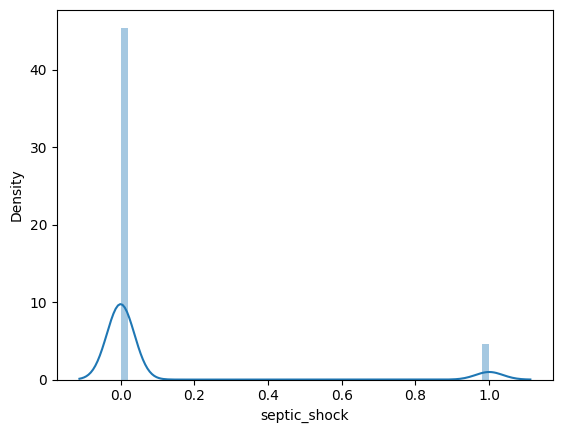

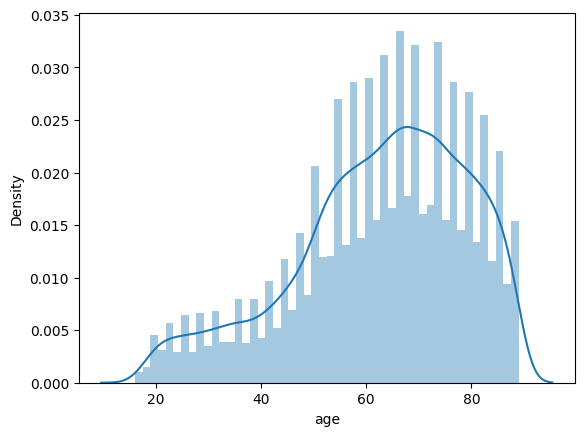

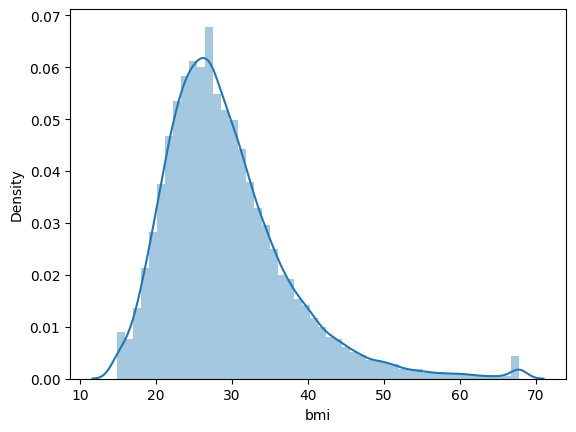

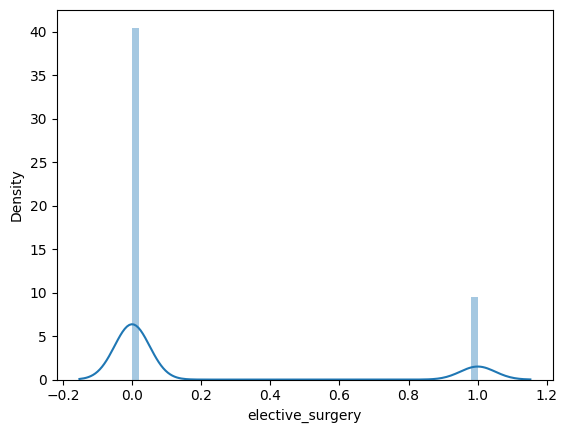

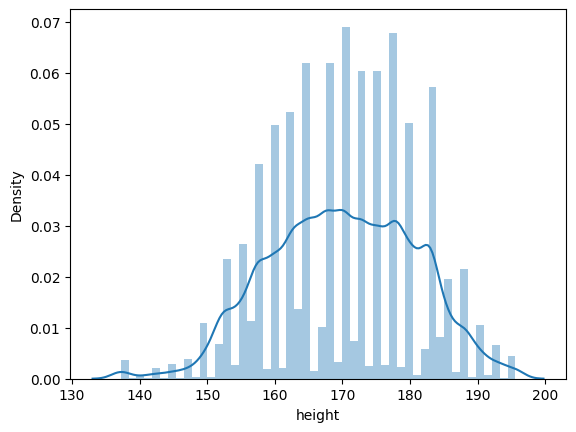

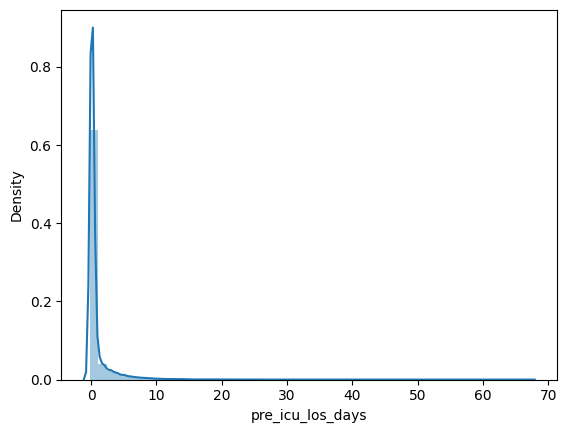

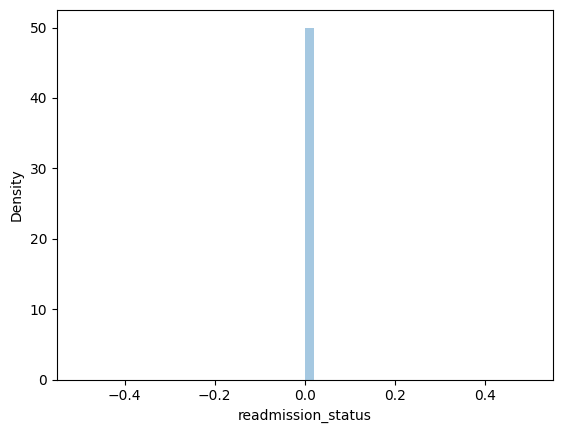

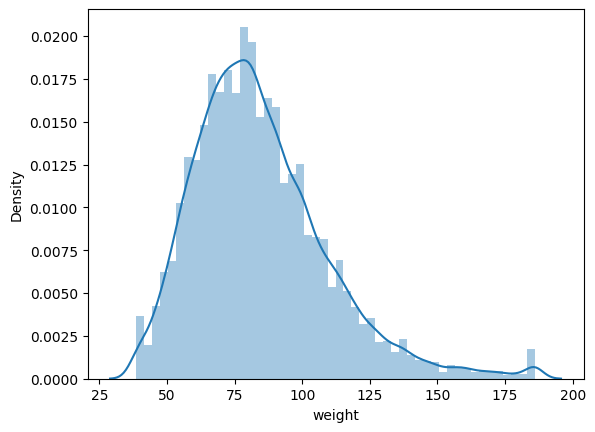

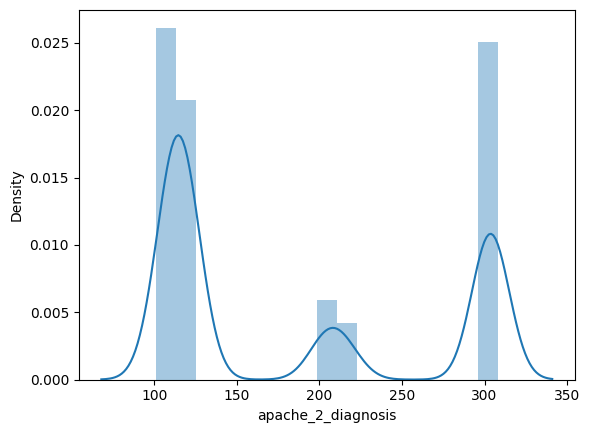

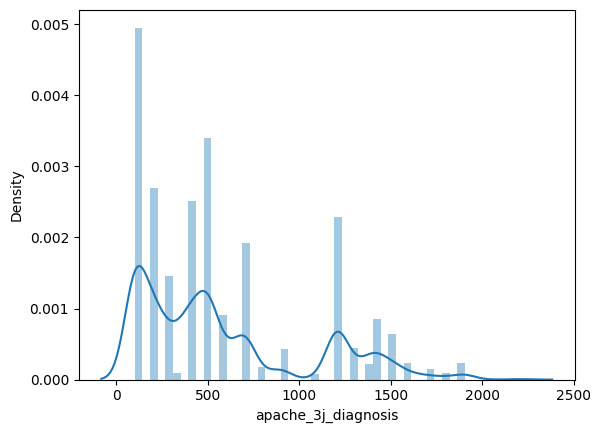

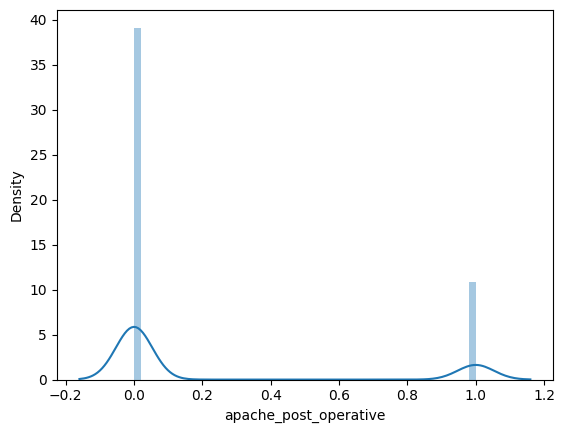

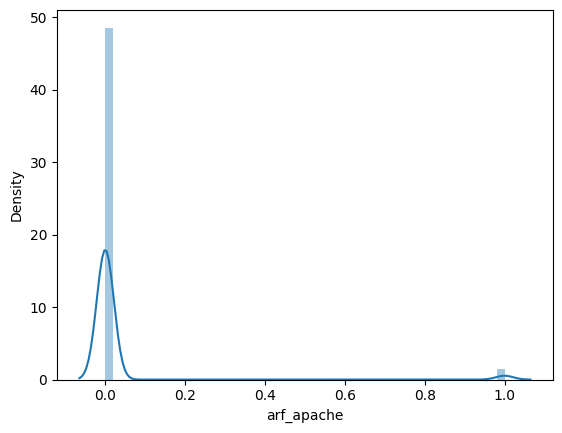

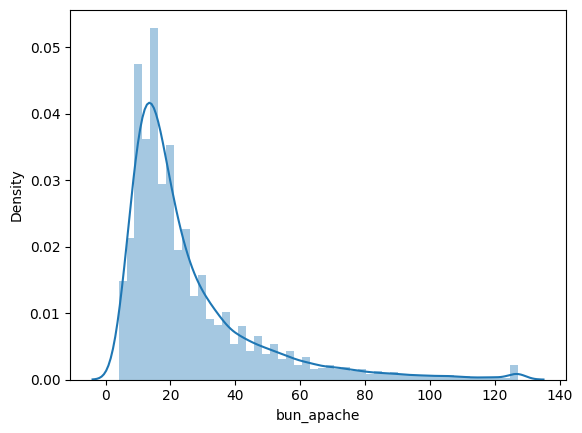

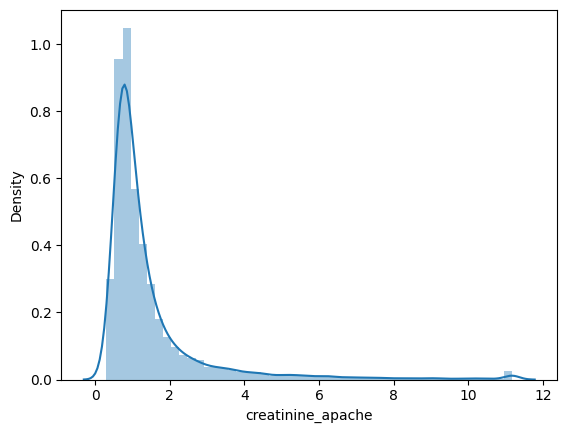

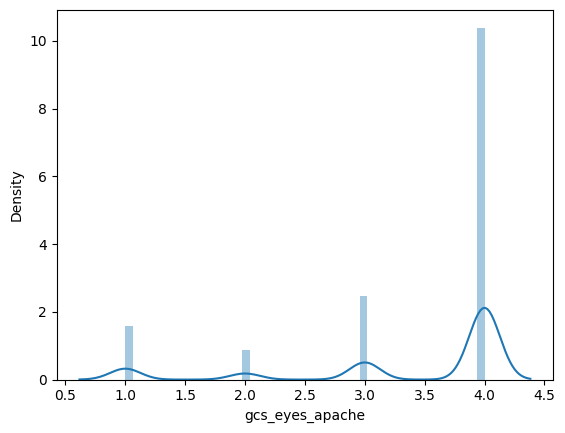

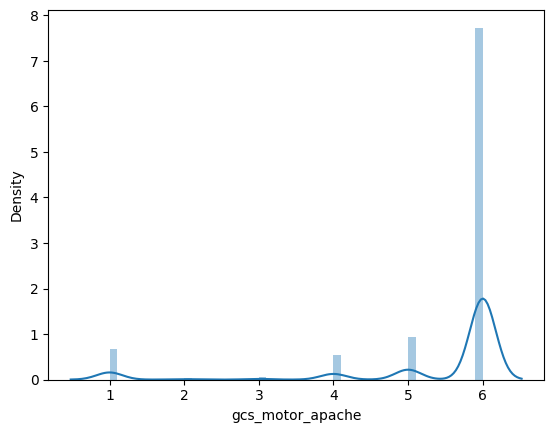

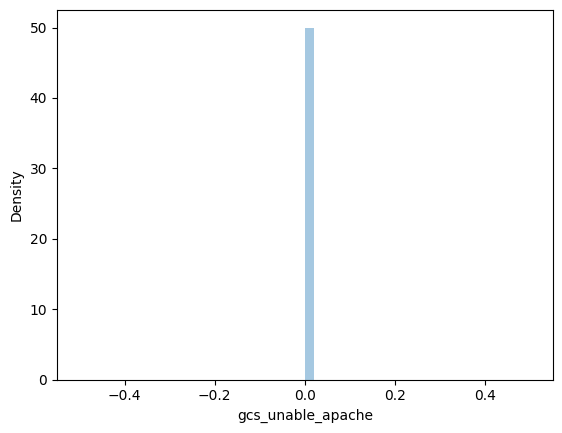

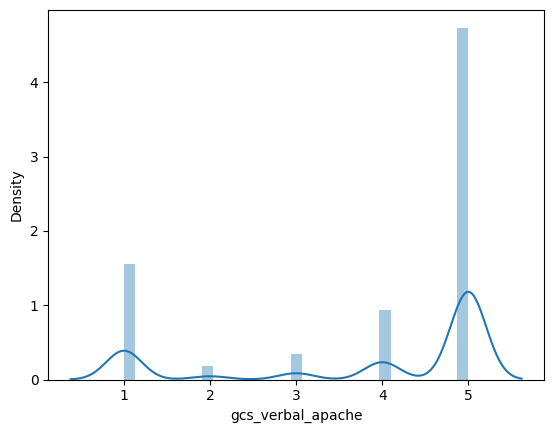

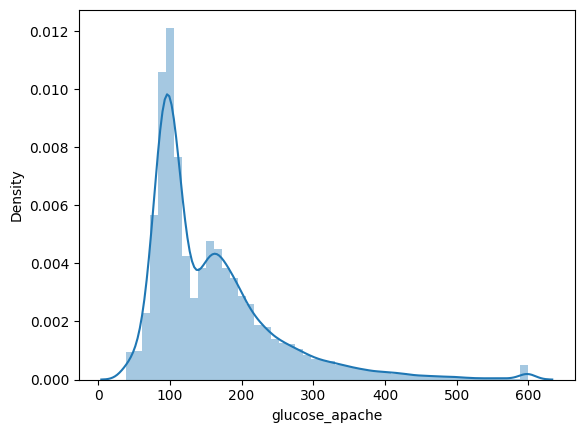

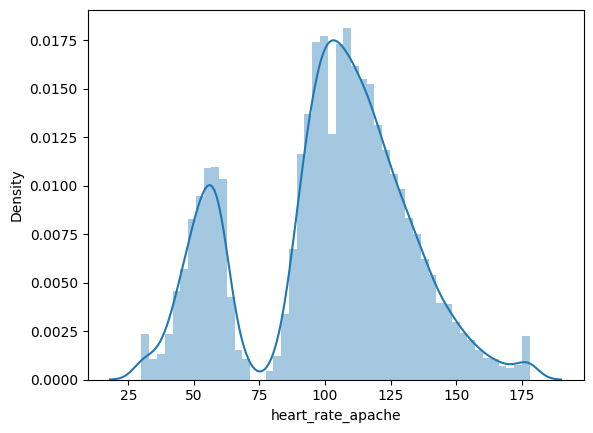

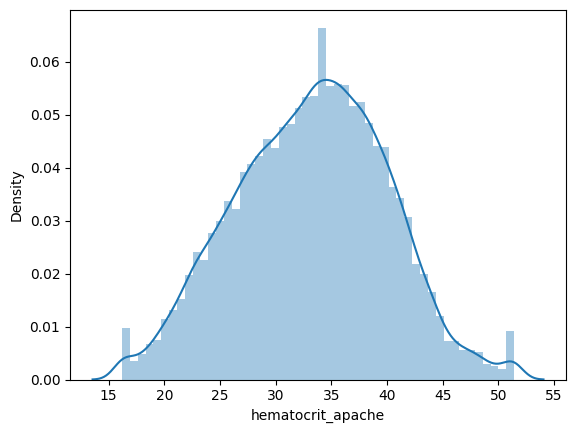

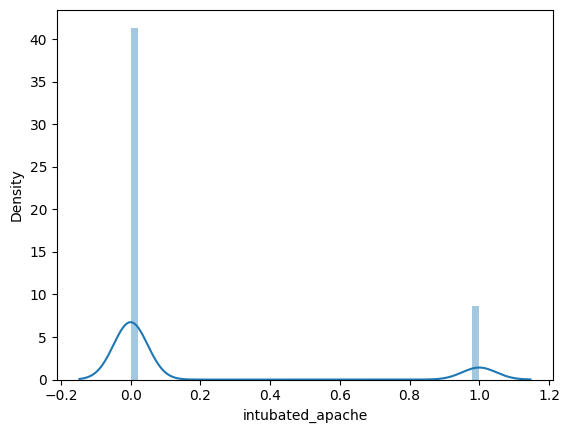

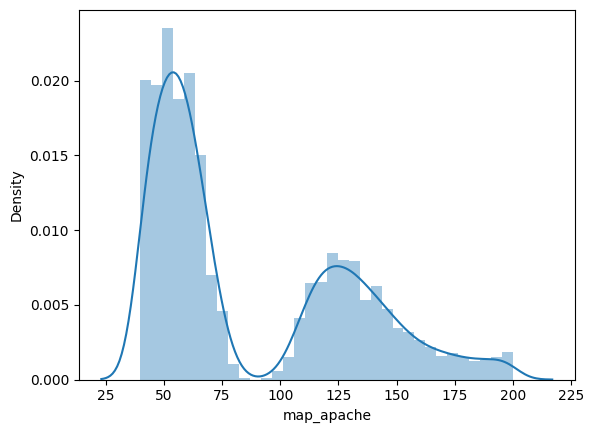

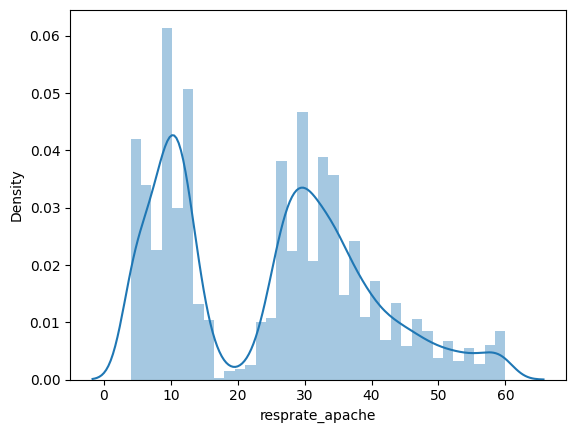

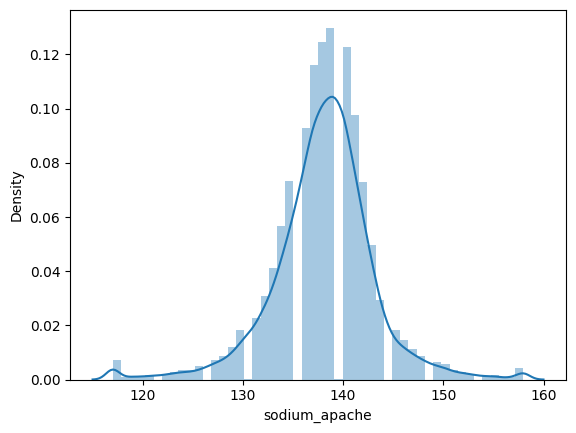

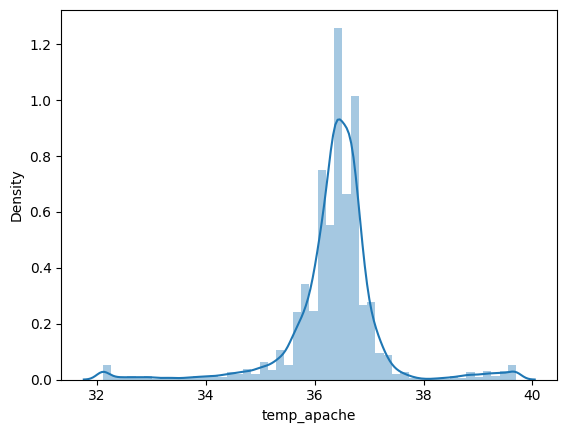

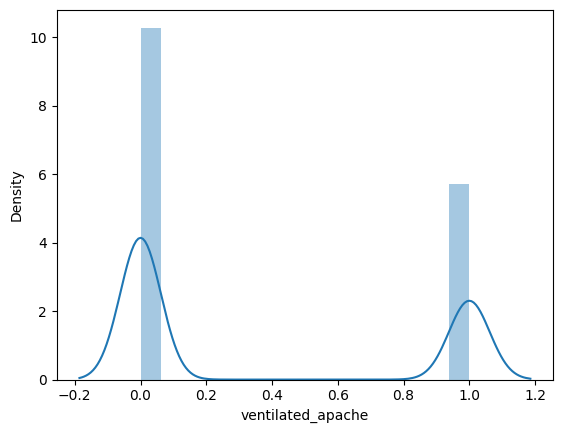

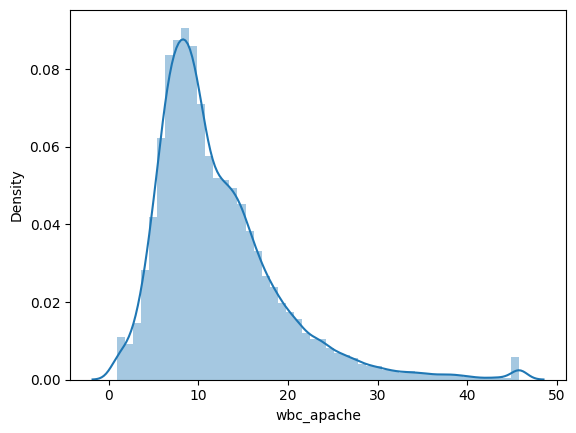

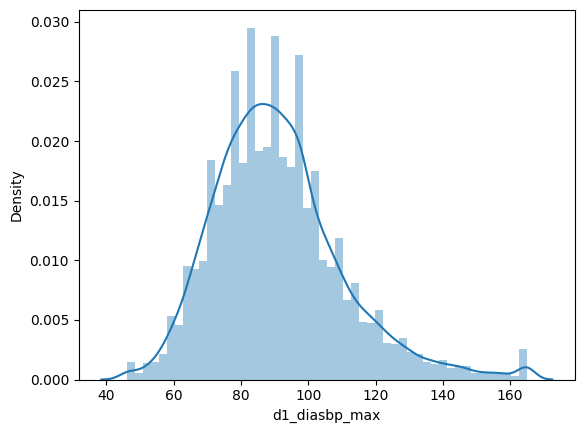

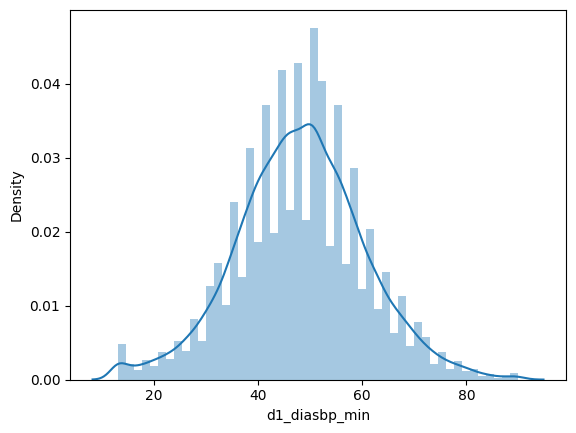

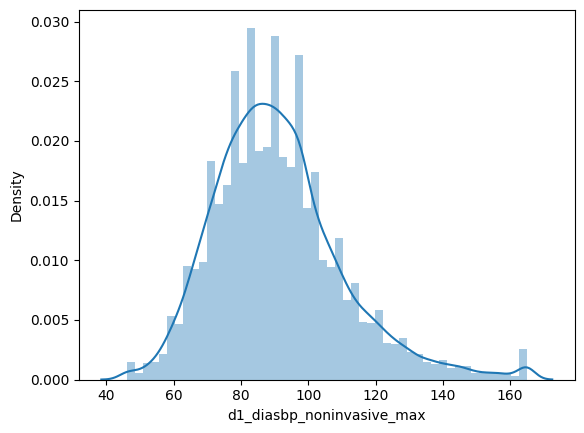

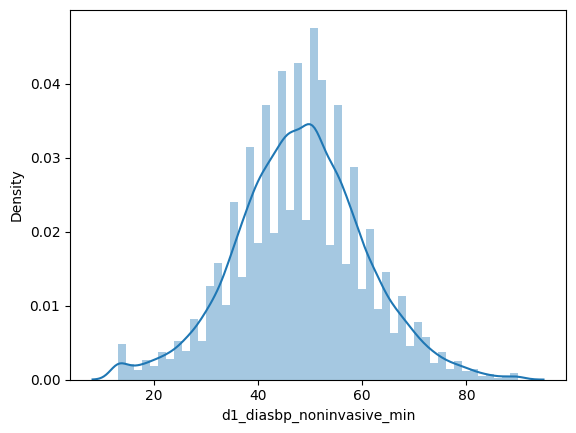

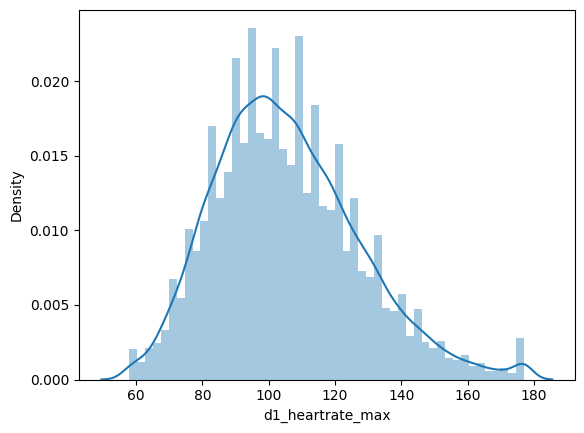

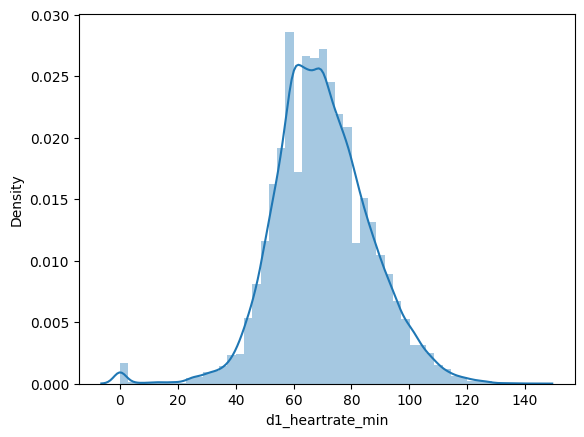

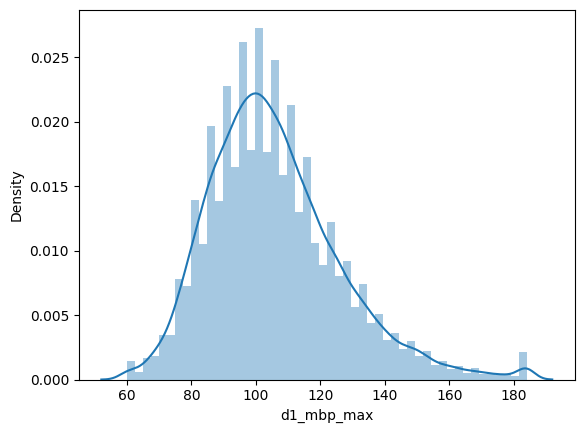

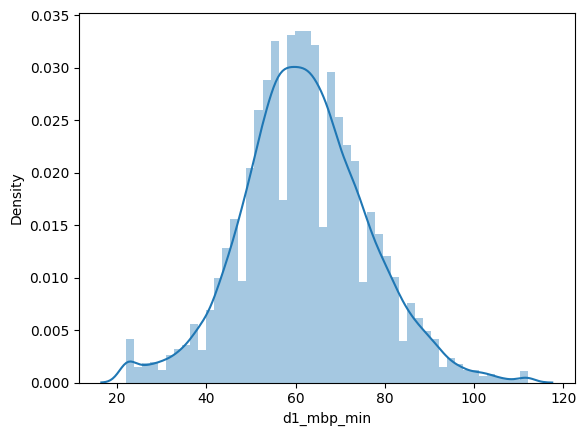

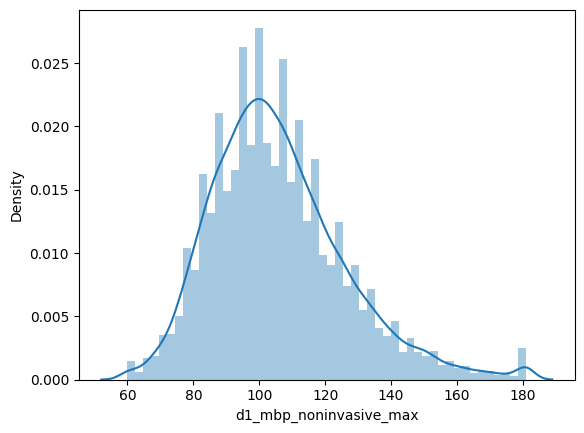

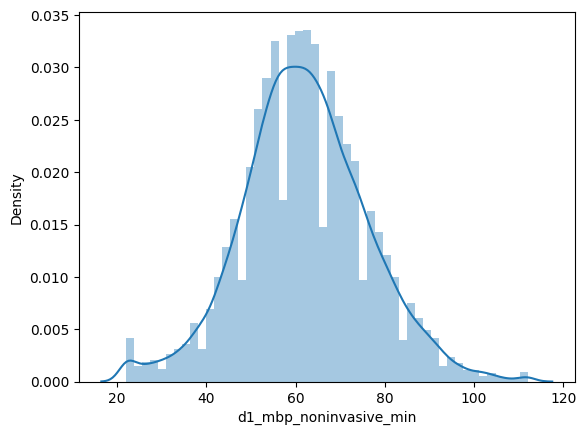

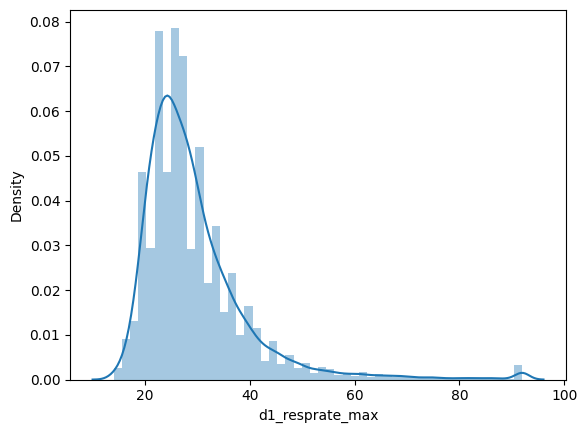

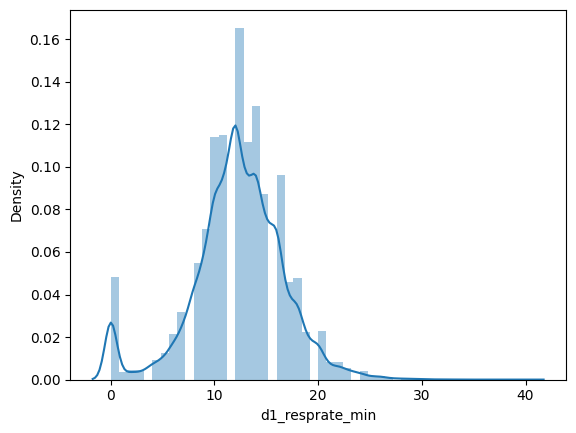

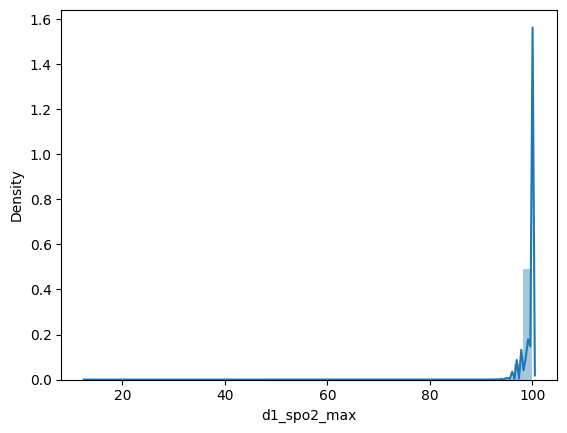

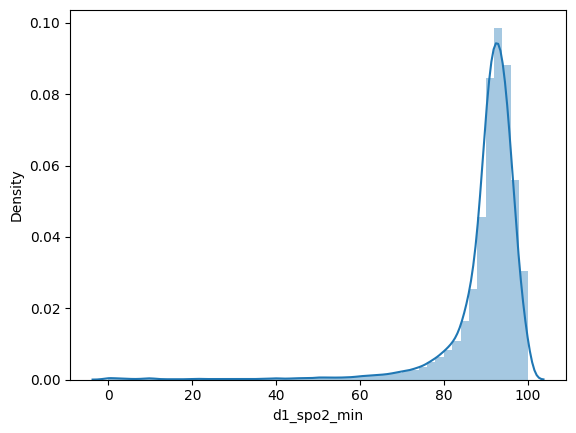

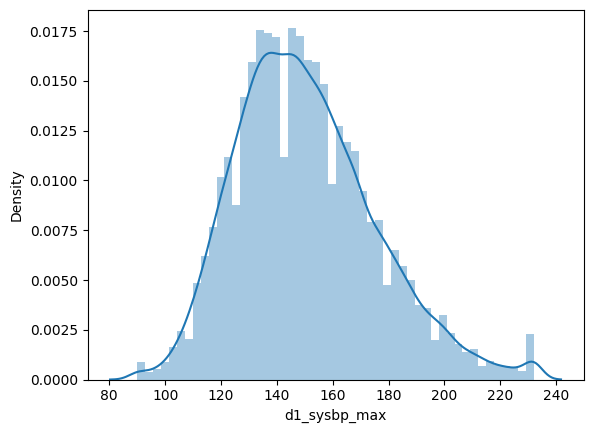

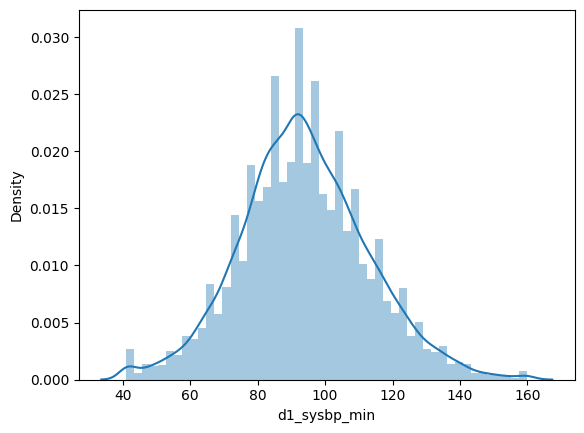

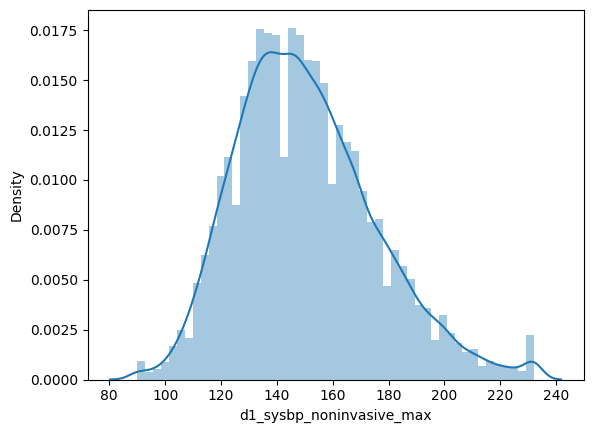

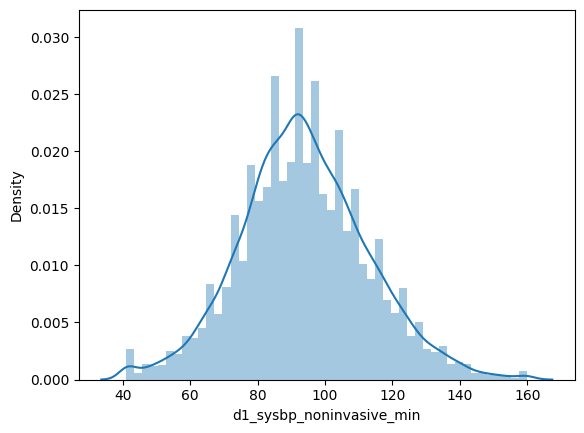

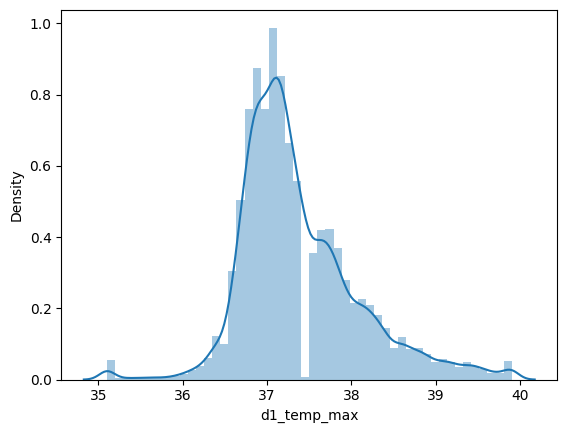

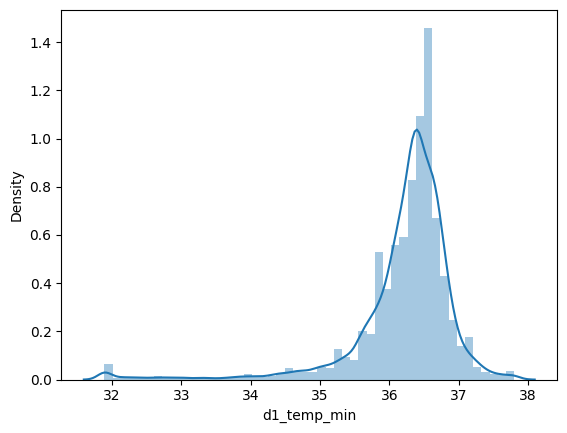

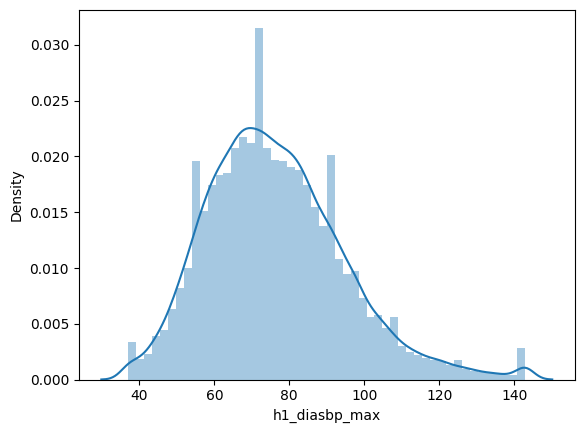

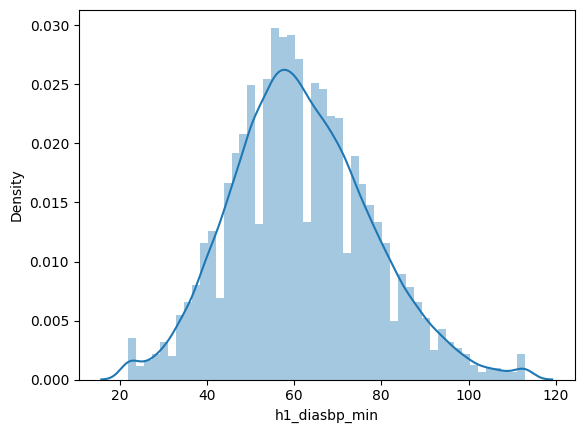

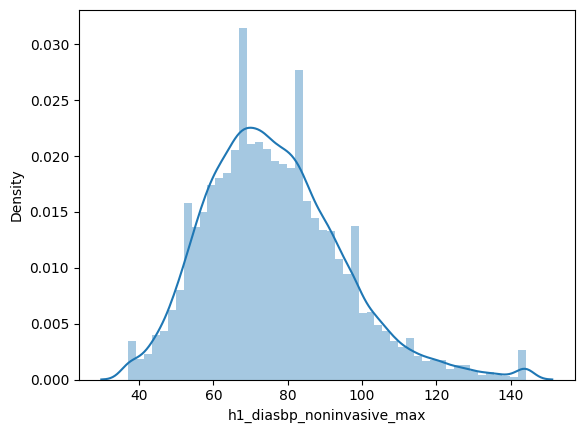

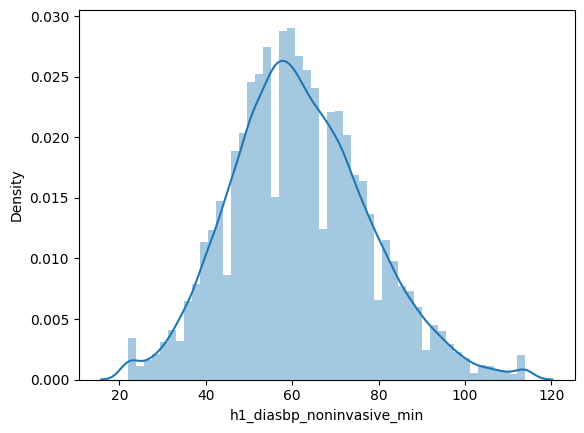

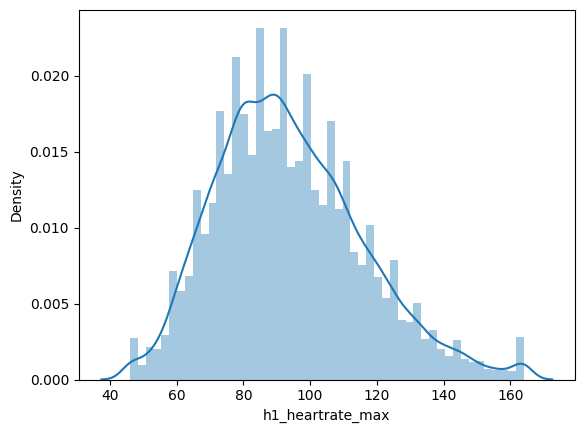

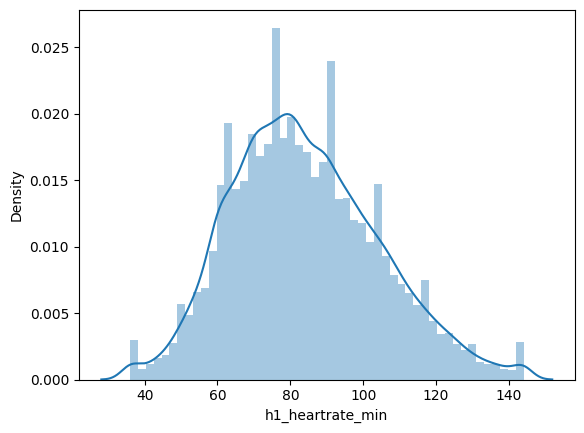

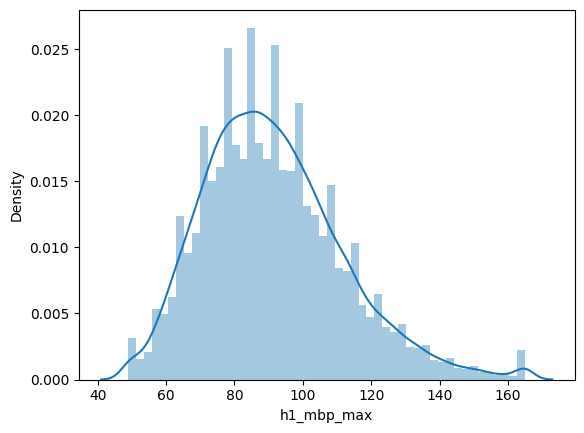

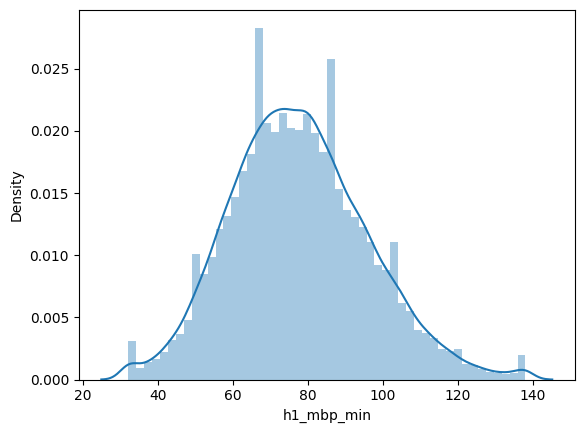

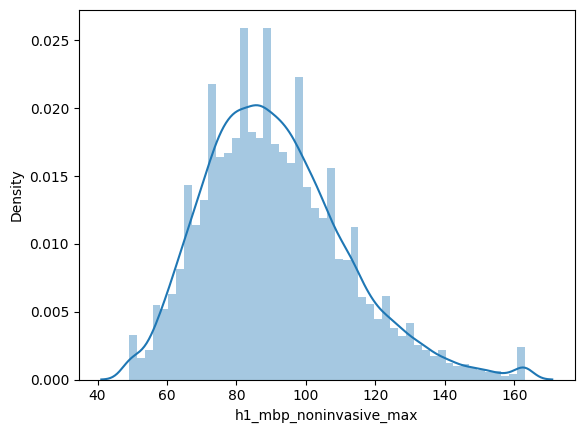

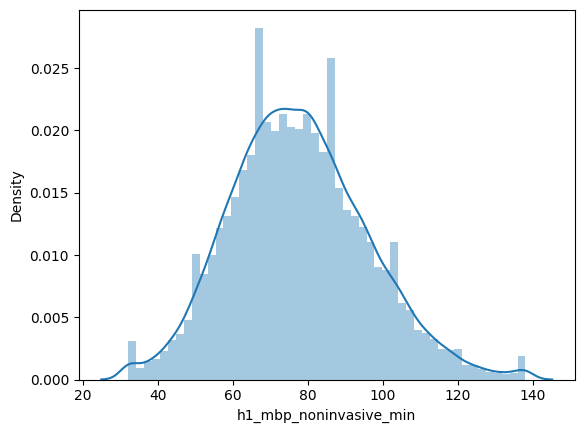

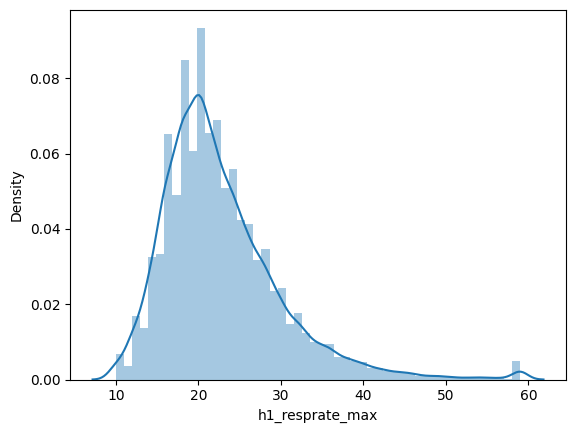

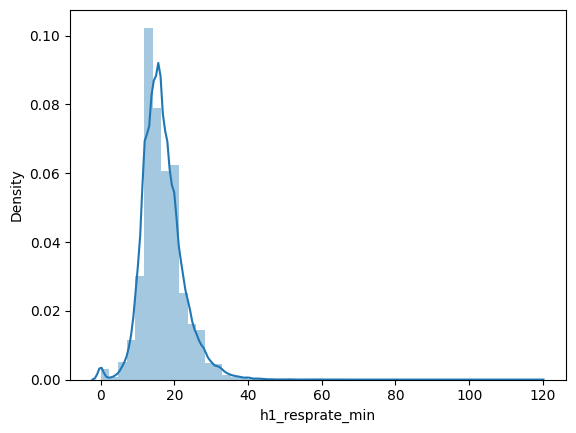

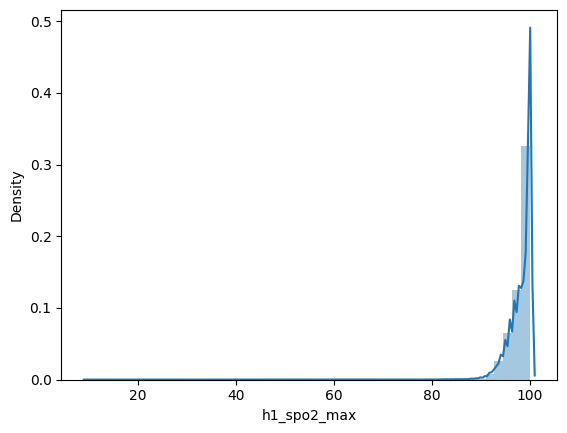

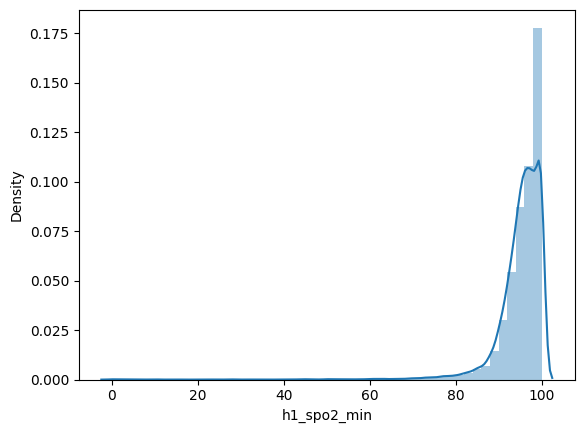

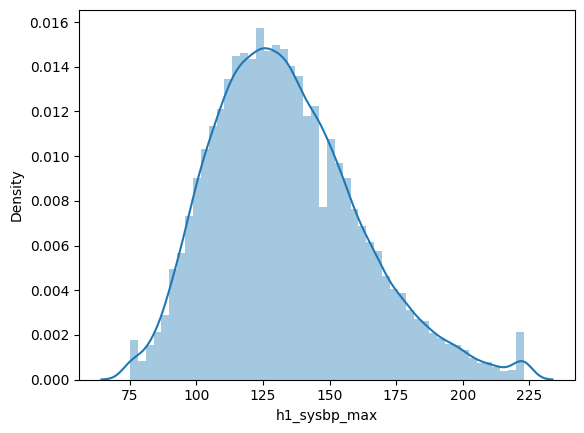

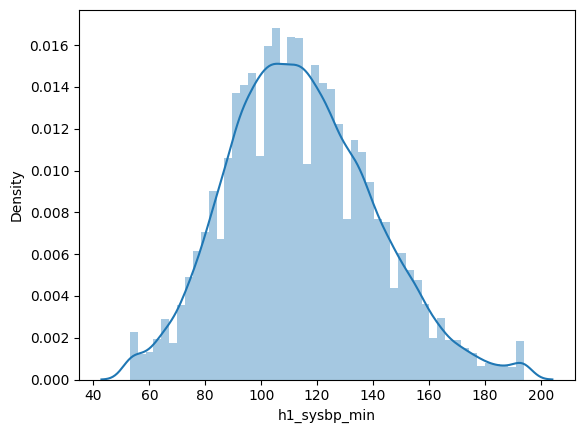

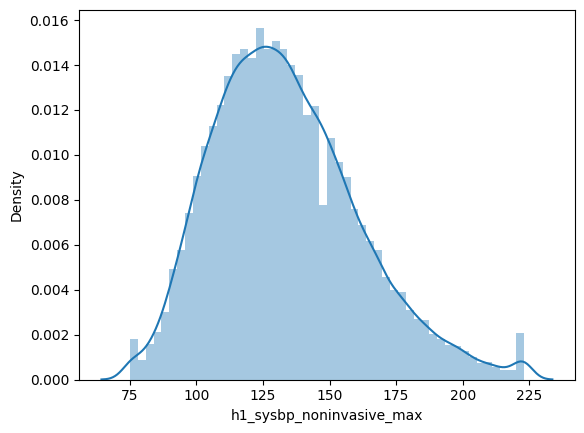

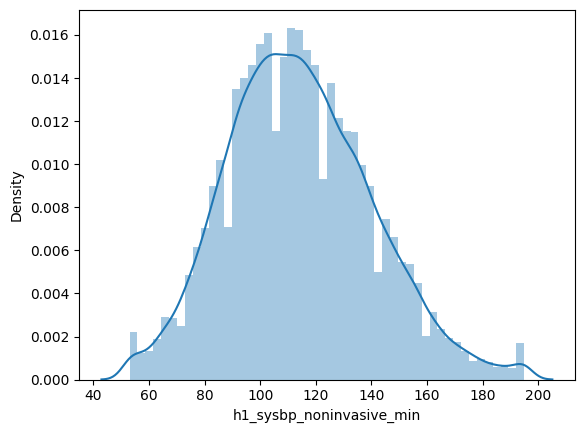

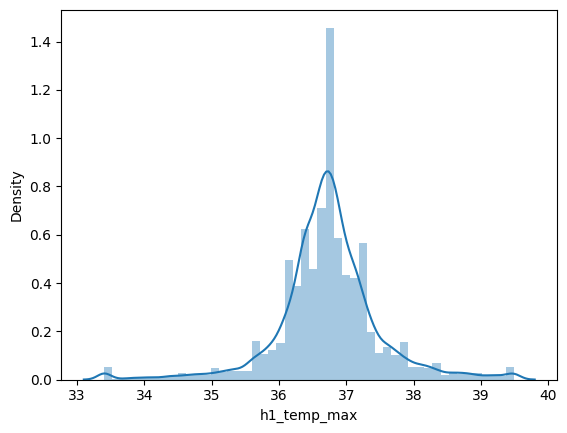

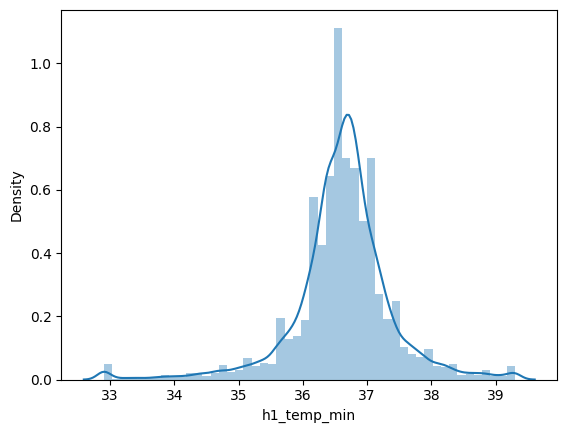

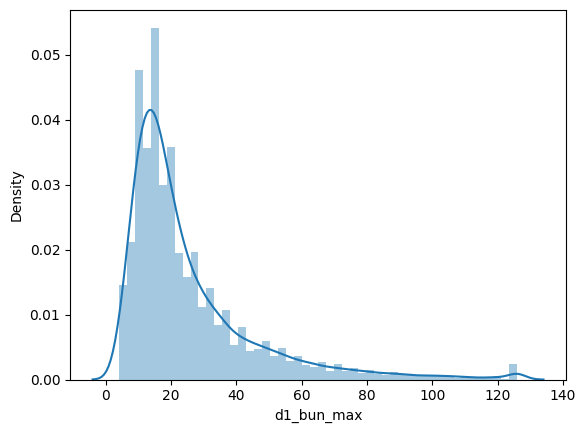

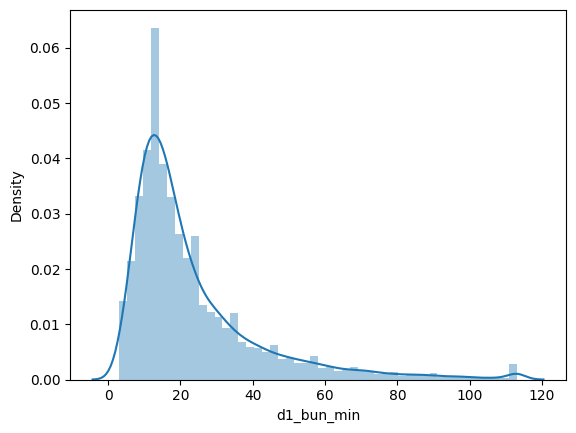

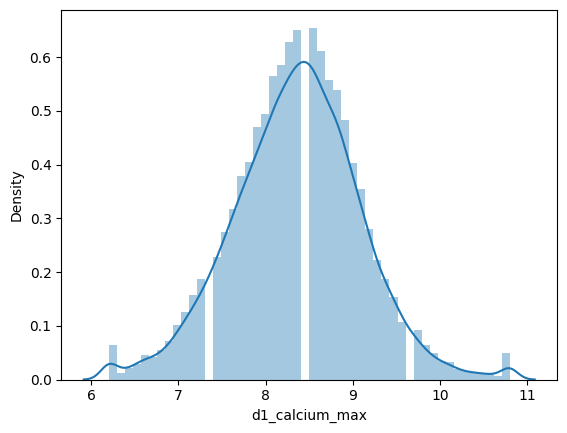

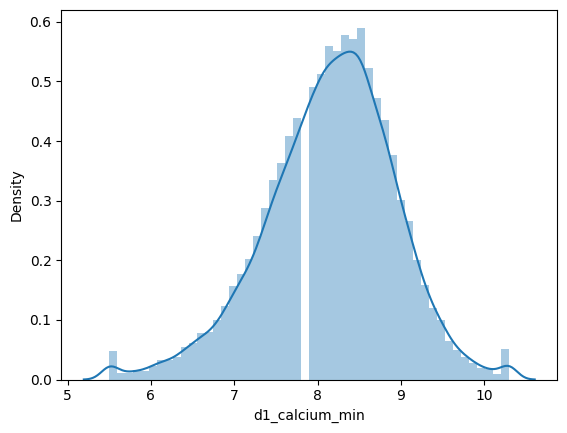

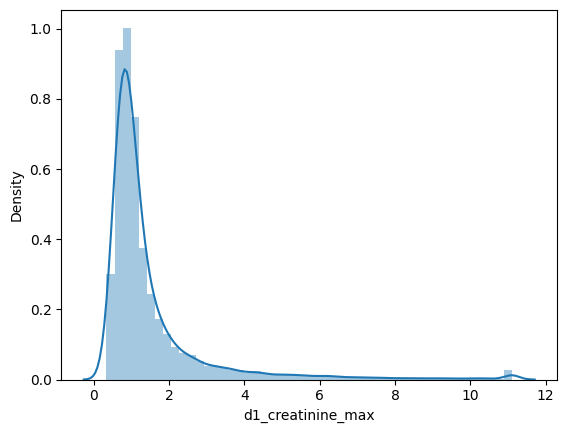

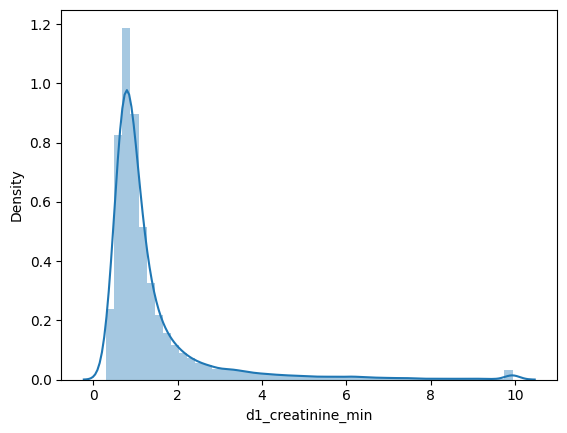

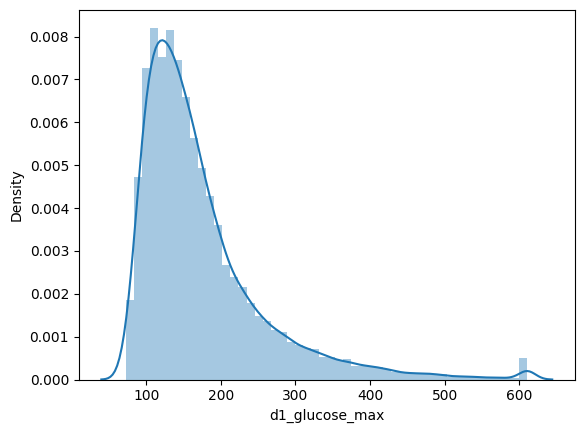

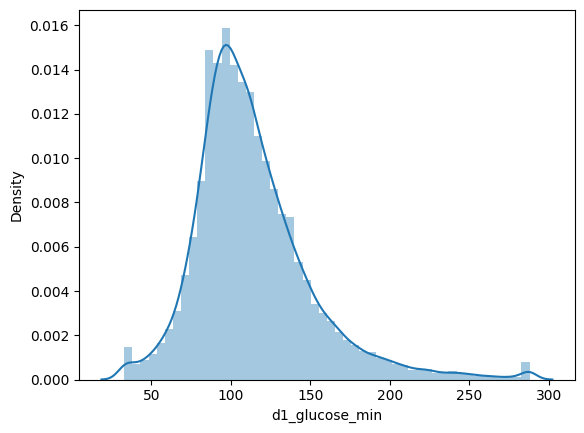

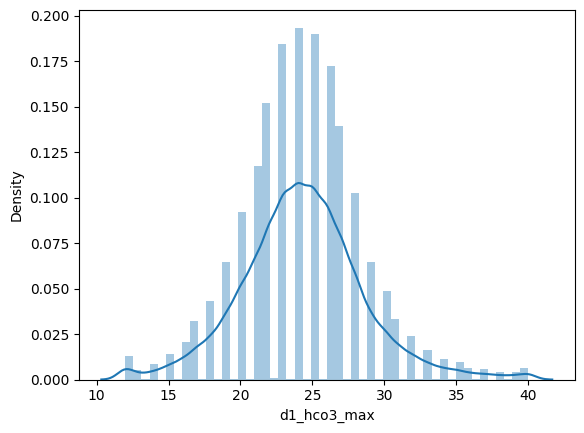

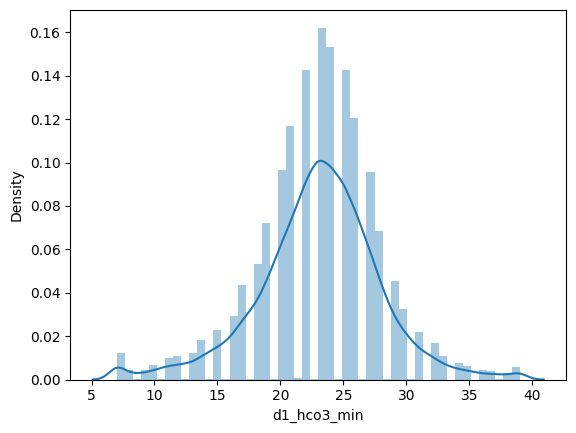

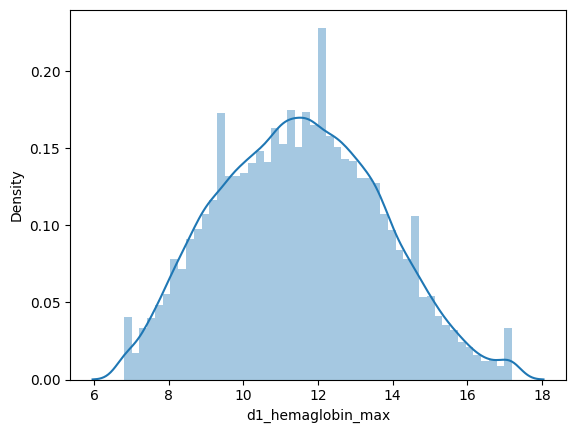

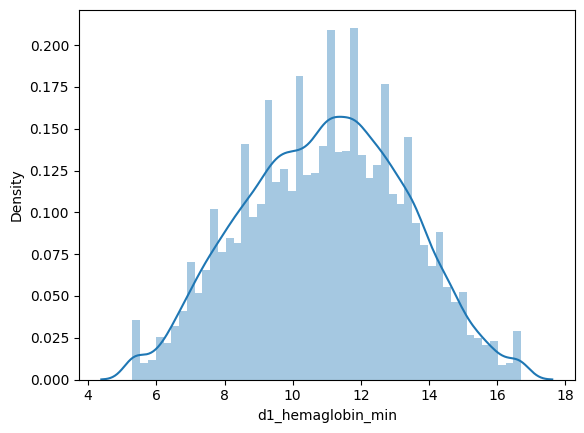

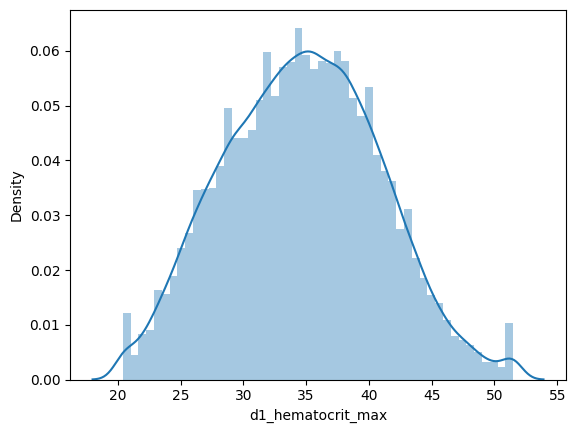

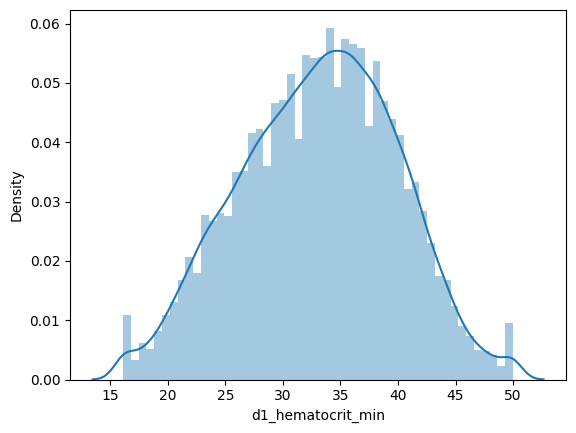

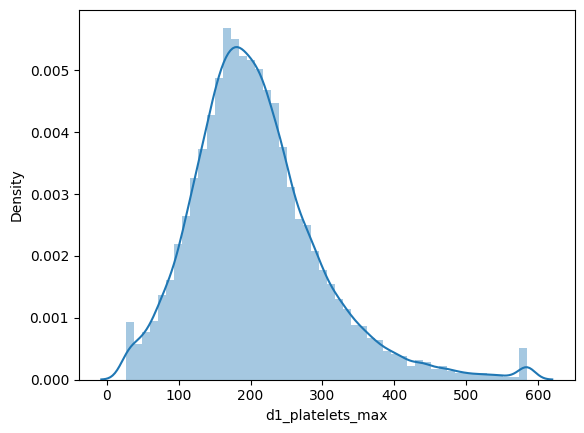

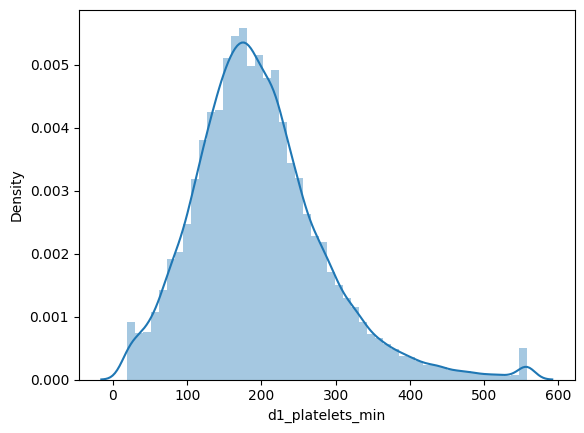

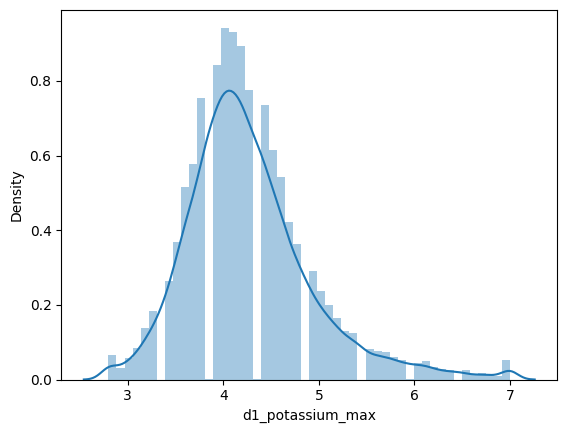

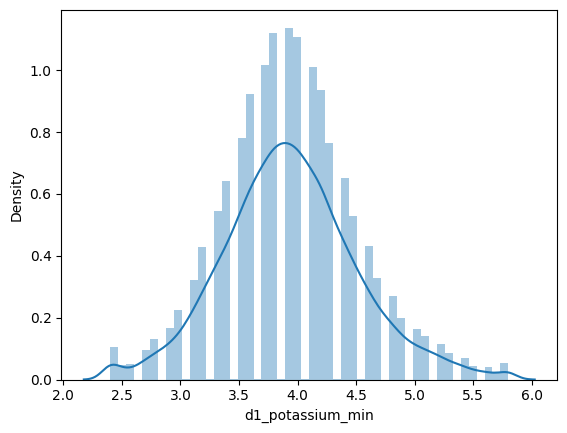

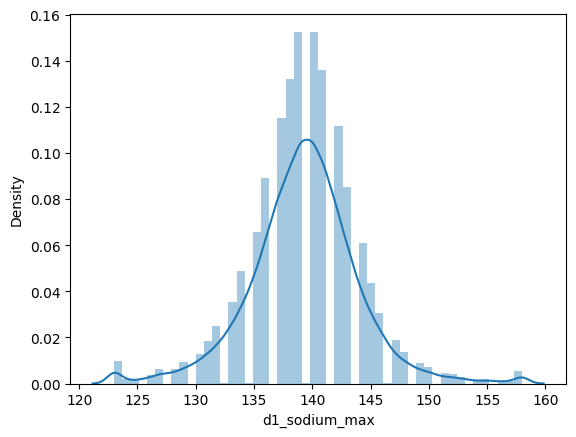

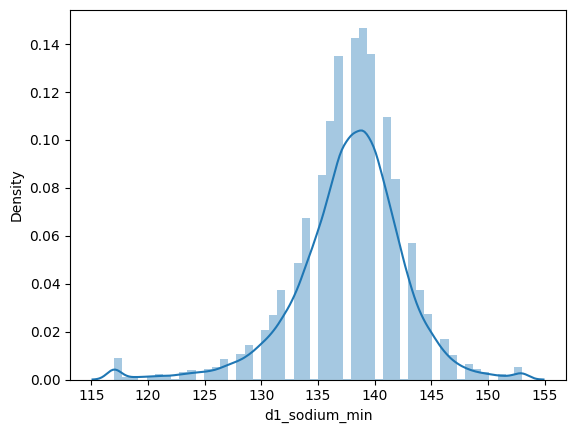

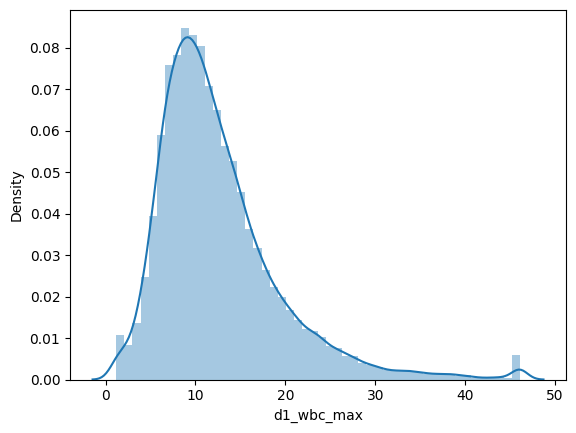

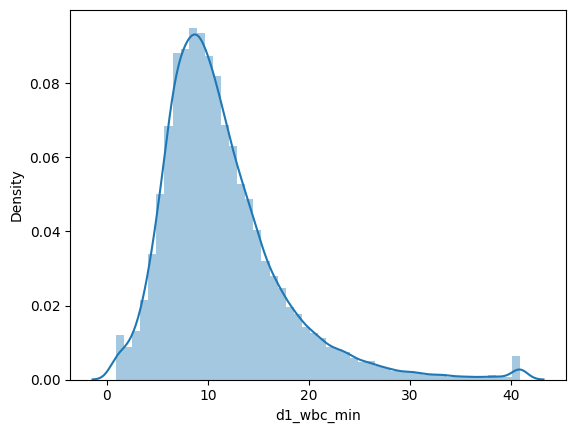

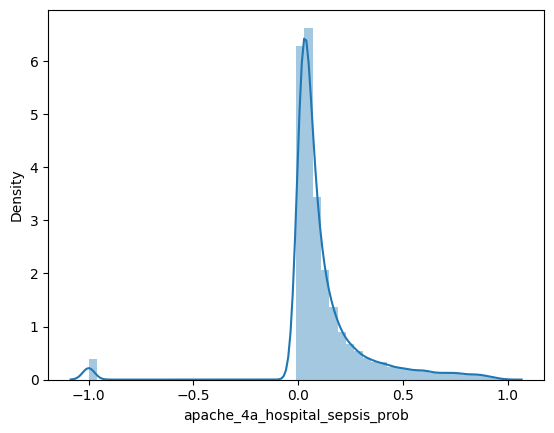

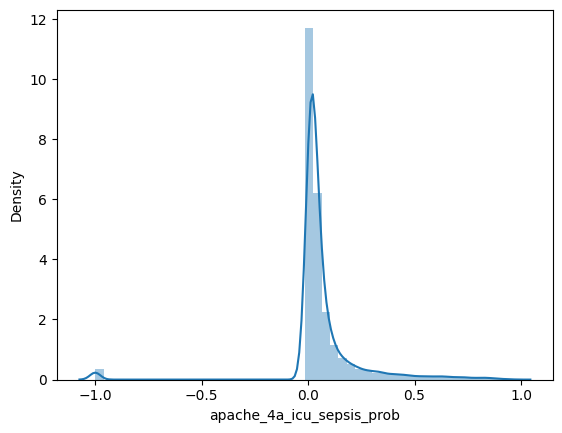

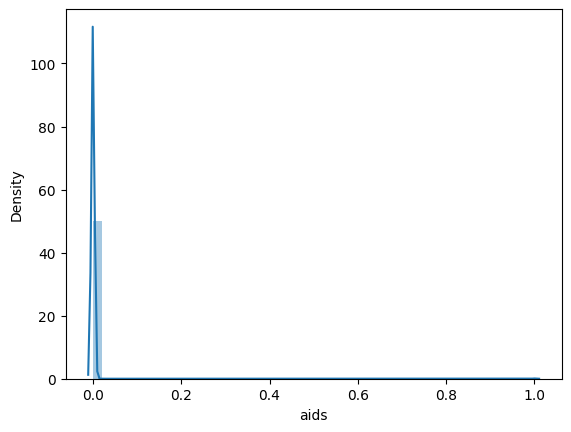

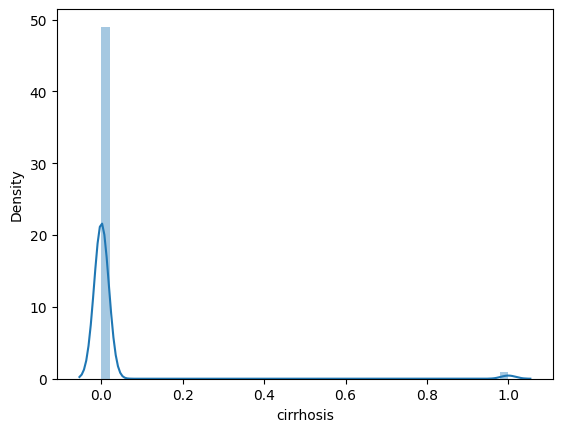

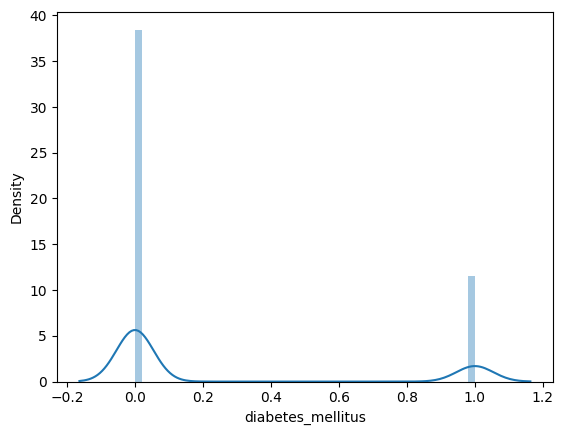

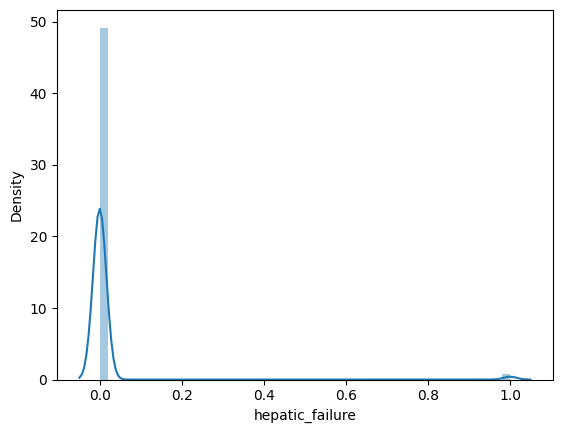

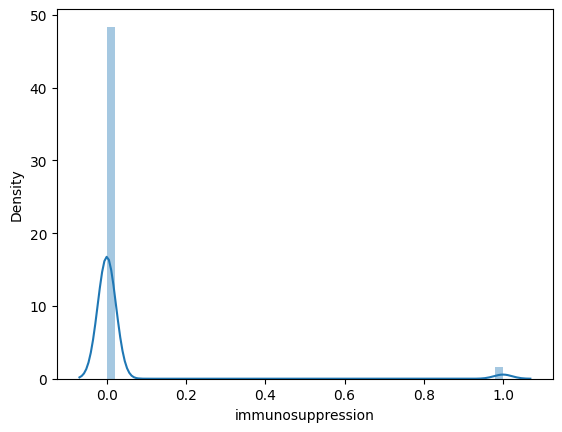

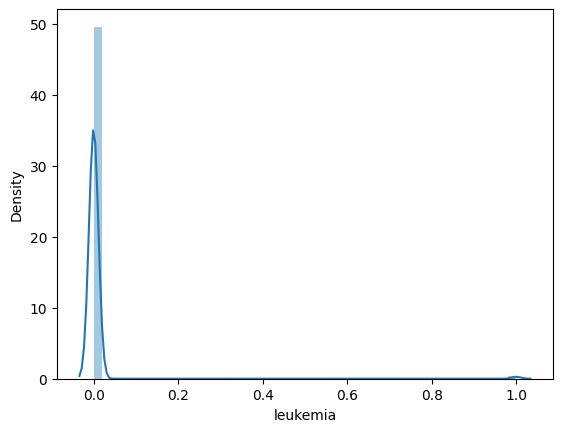

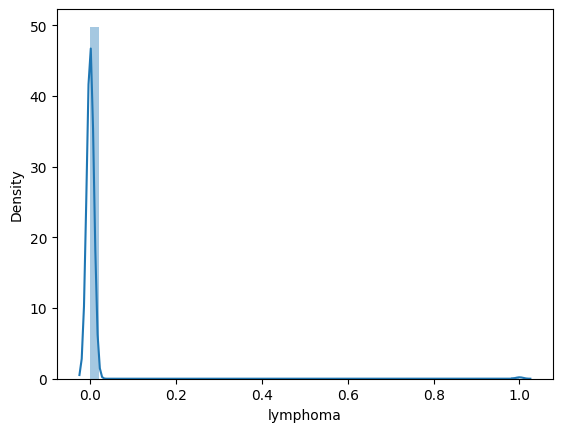

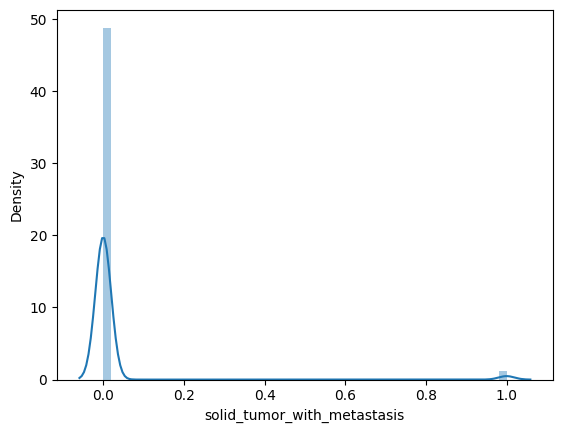

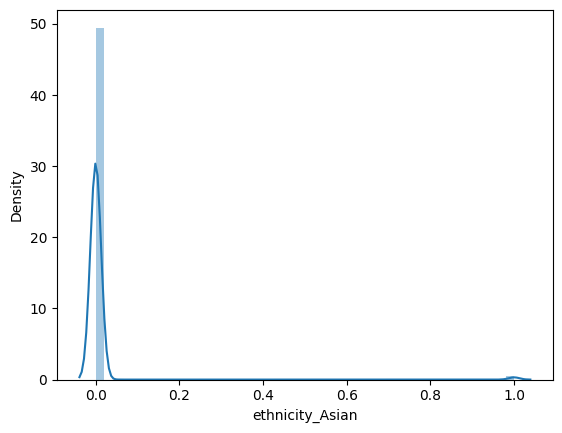

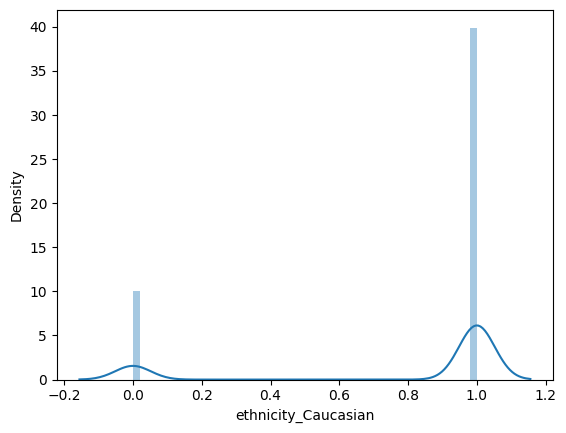

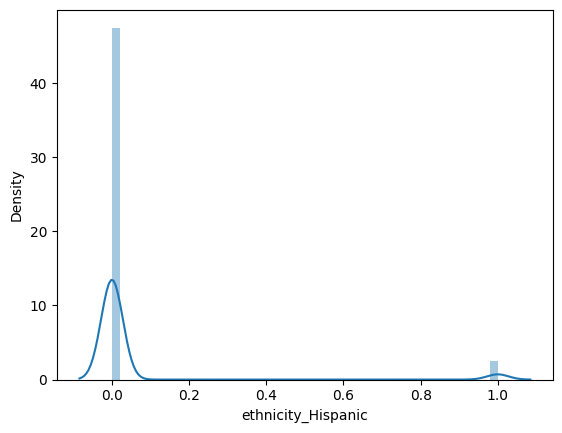

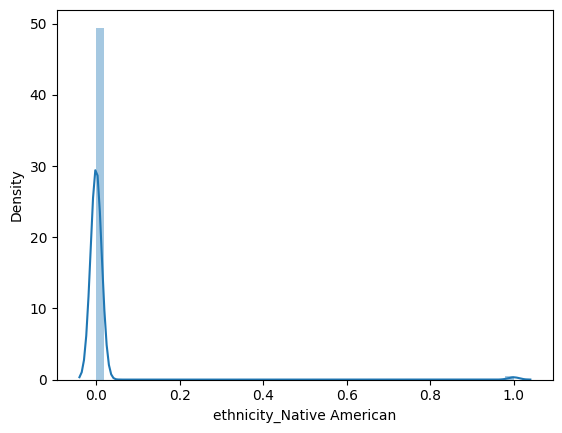

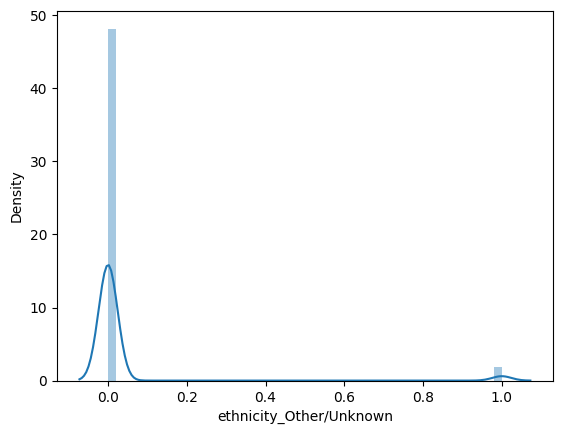

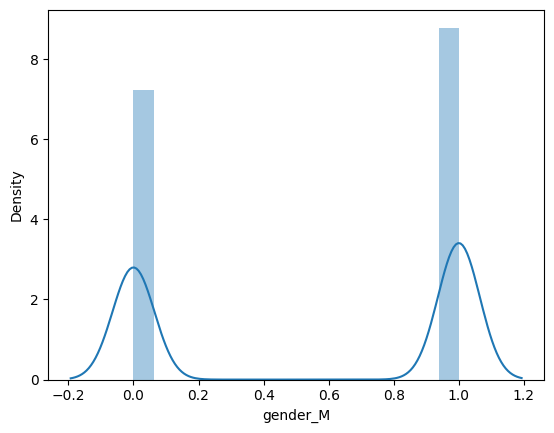

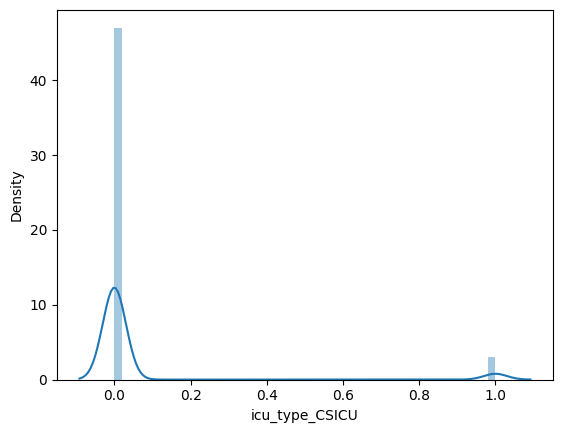

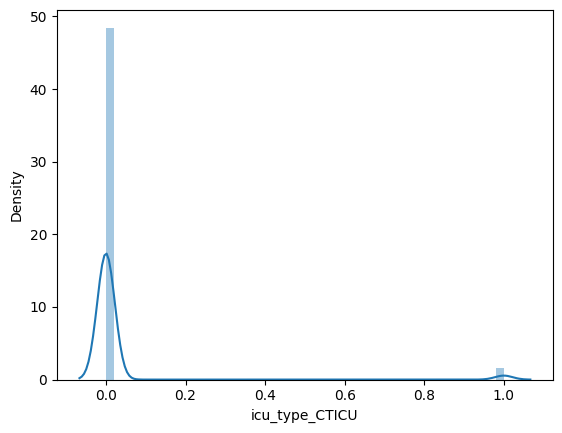

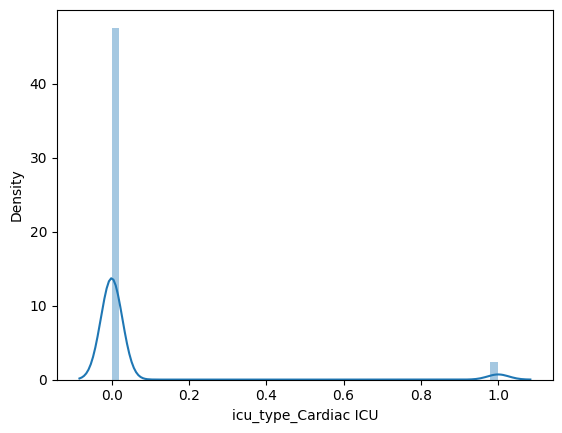

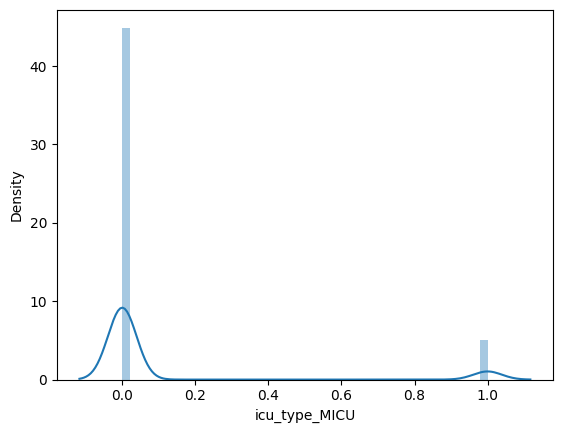

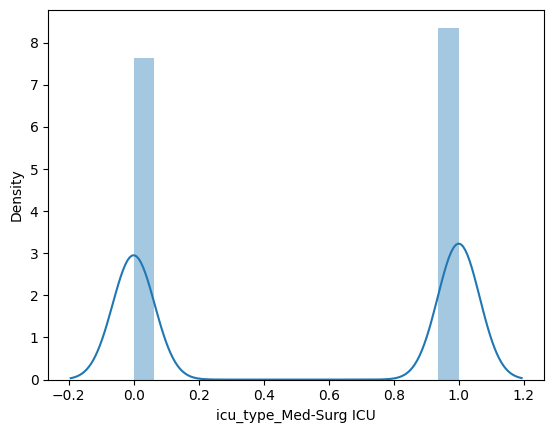

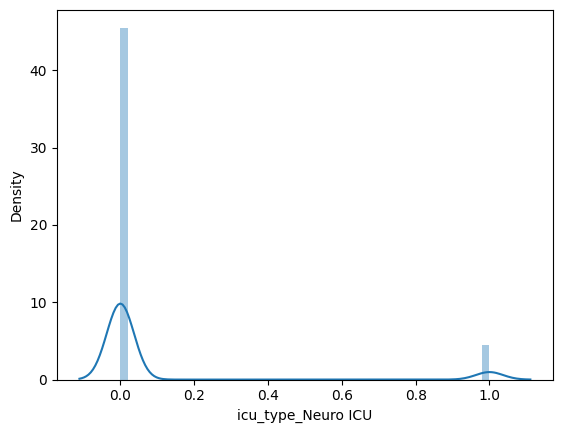

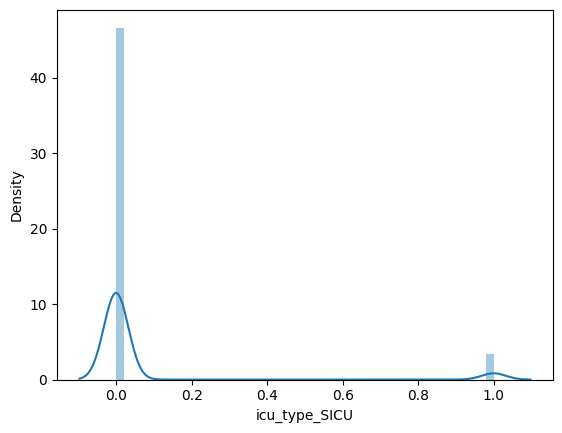

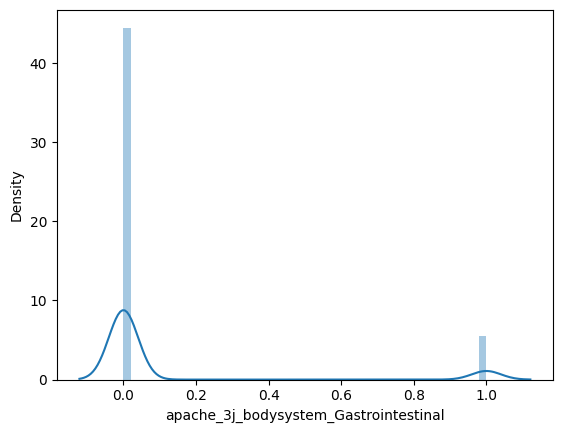

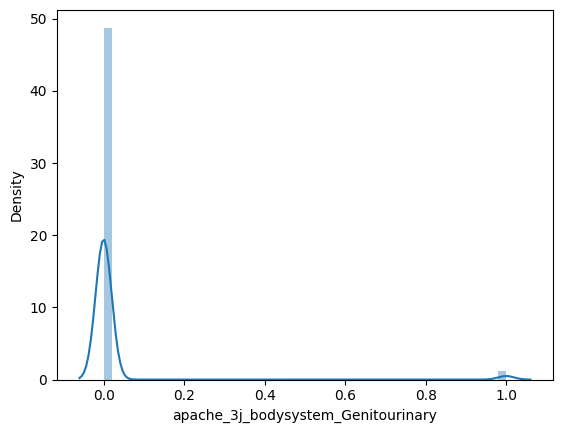

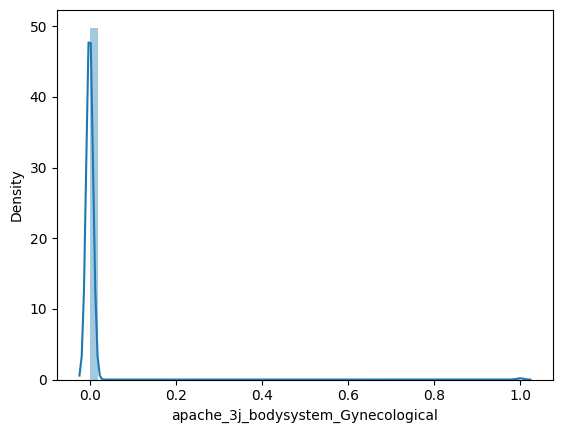

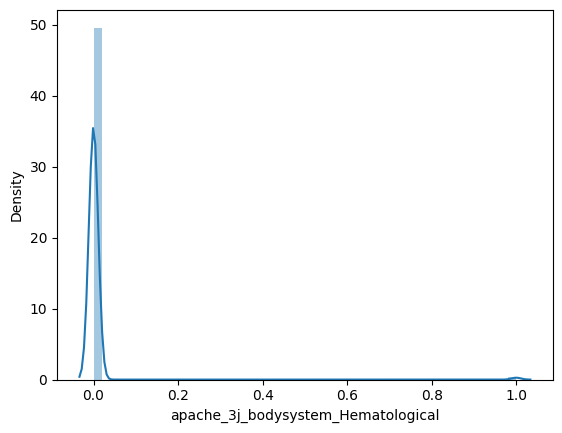

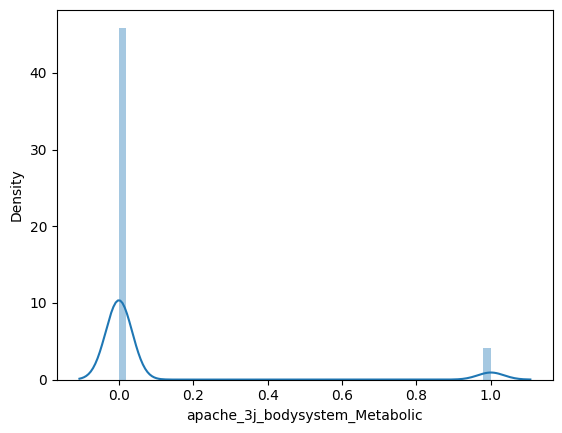

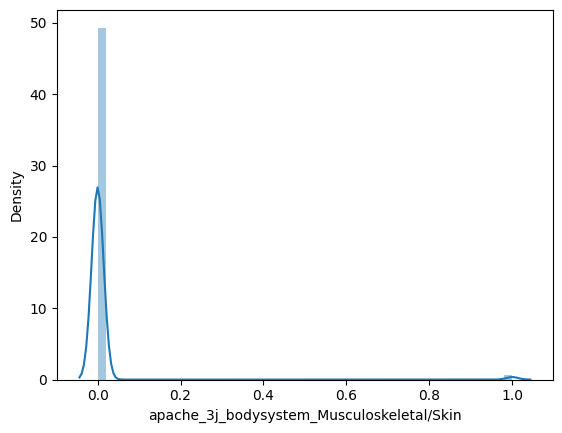

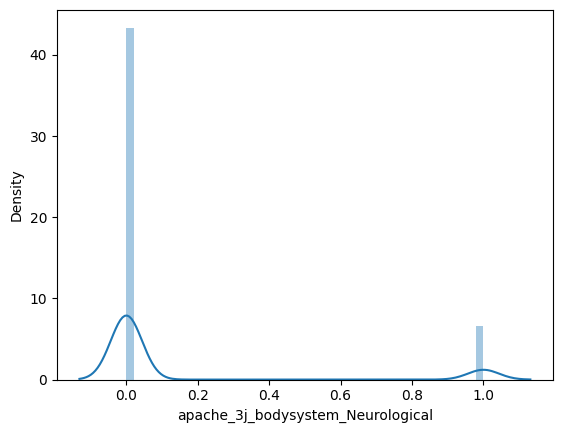

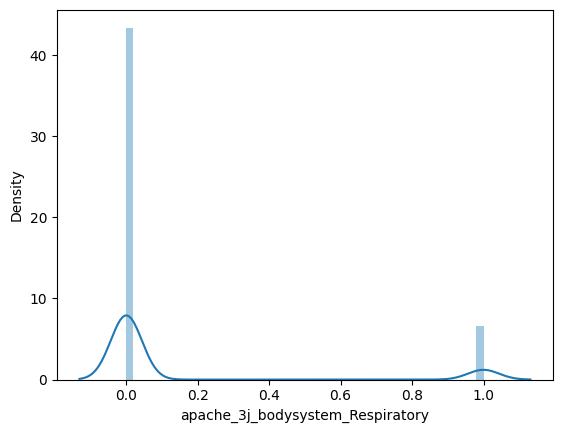

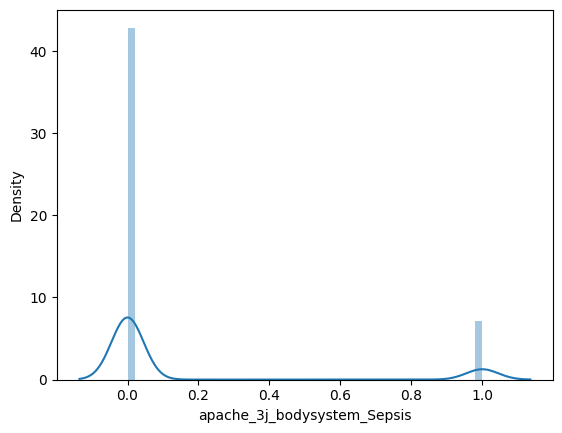

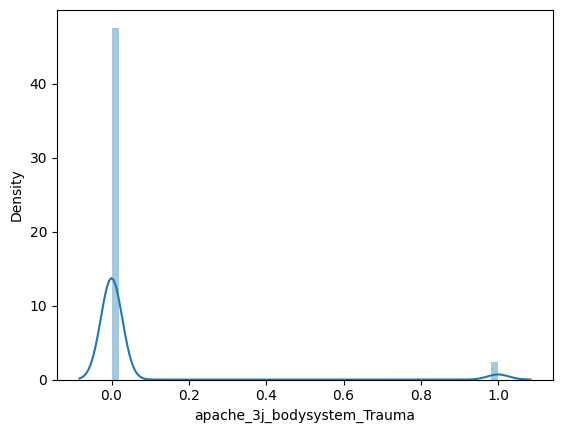

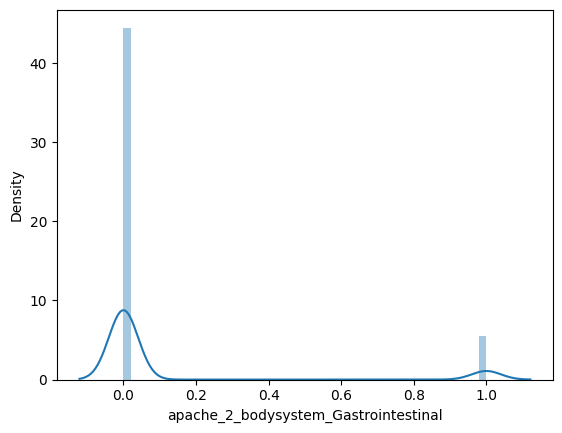

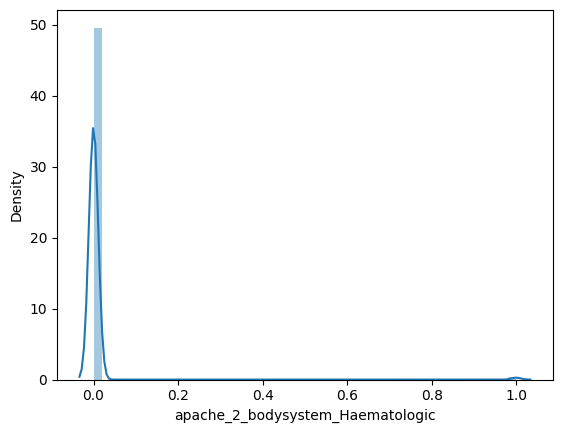

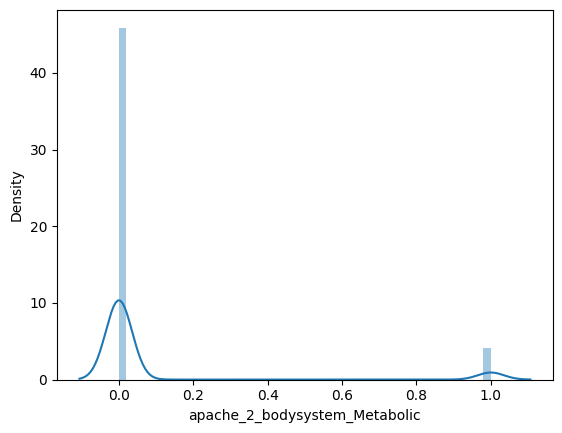

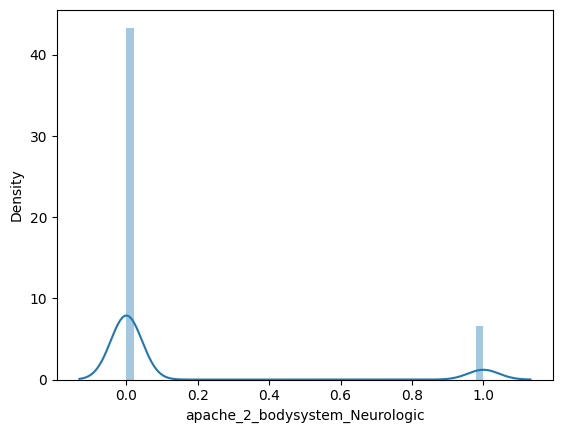

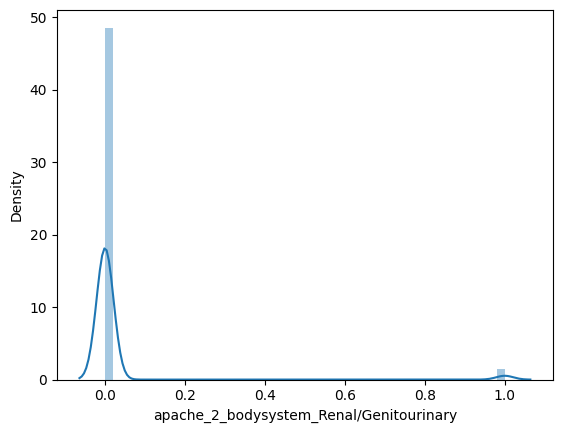

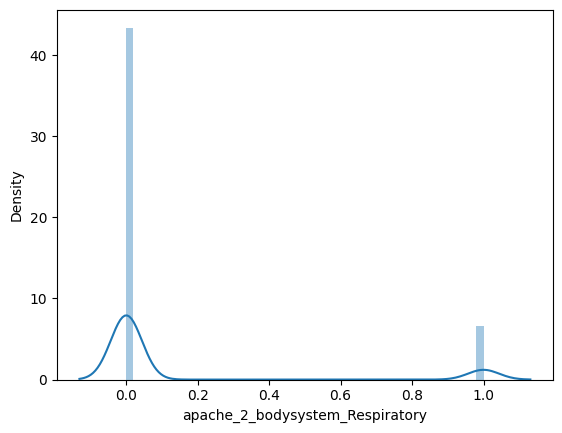

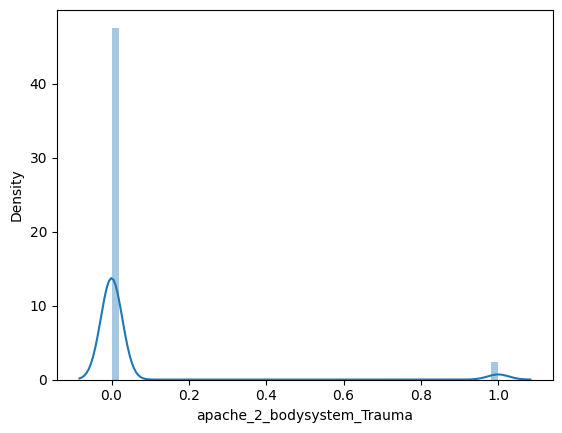

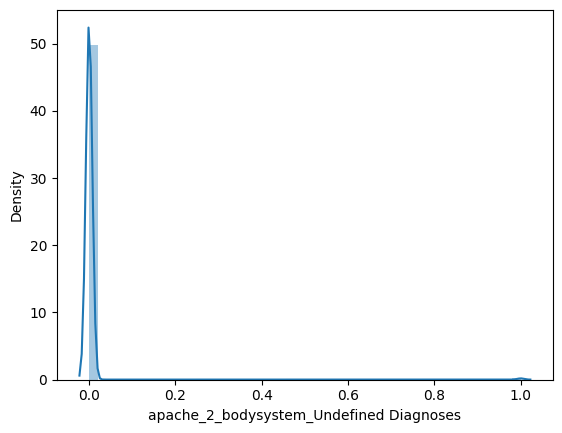

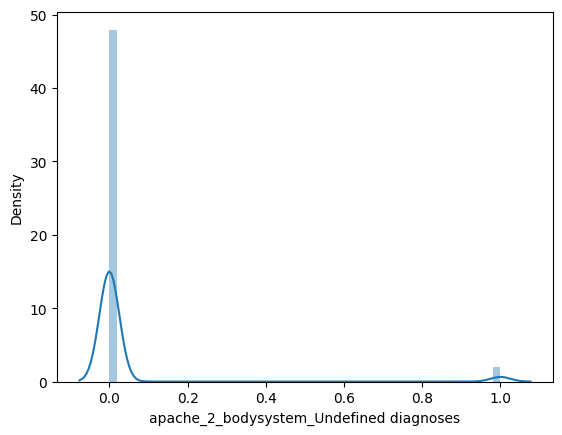

In [ ]:
# Find Distribution about data

def distplots(cols):
  sns.distplot(df1_final[cols])
  plt.show()

for i in list(df1_final.columns)[1:]:
  distplots(i)

In [ ]:
# Dependence plot

In [ ]:
from sklearn .inspection import PartialDependenceDisplay

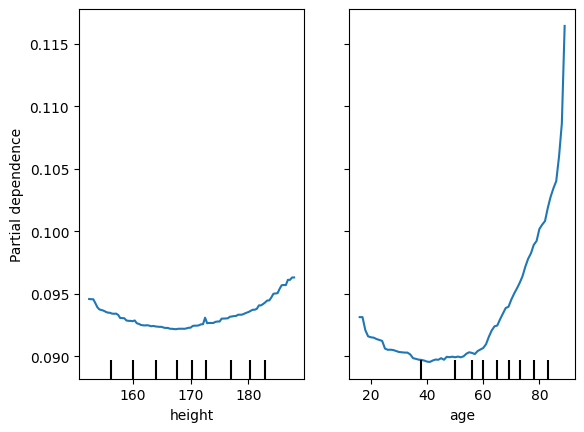

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model=rf.fit(x,y)
disp1=PartialDependenceDisplay.from_estimator(model,x,["height","age"])
plt.show()

In [ ]:
# Scaling

from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_scaled=scale.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

hospital_id       age       bmi  elective_surgery    height  \
0     0.574257  0.712329  0.148859               0.0  0.738140   
1     0.391089  0.835616  0.237400               0.0  0.390478   
2     0.400990  0.698630  0.240043               0.0  0.912828   
3     0.574257  0.410959  0.207679               0.0  0.520637   
4     0.574257  0.972603  0.134394               0.0  0.738140   

   pre_icu_los_days    weight  apache_2_diagnosis  apache_3j_diagnosis  \
0          0.011390  0.239484            0.057971             0.190949   
1          0.017132  0.214383            0.033816             0.048571   
2          0.003346  0.416554            0.966184             0.143807   
3          0.003336  0.230665            0.033816             0.048571   
4          0.078379  0.222524            0.057971             0.190492   

   arf_apache  bun_apache  creatinine_apache  gcs_eyes_apache  \
0         0.0    0.219512           0.203125         0.666667   
1         0.0    0.040650           0.023897         0.000000   
2         0.0    0.073171           0.037684         1.000000   
3         0.0    0.089431           0.064338         0.000000   
4         0.0    0.073171           0.058824         0.666667   

   gcs_motor_apache  gcs_verbal_apache  glucose_apache  heart_rate_apache  \
0               1.0               0.75        0.230481           0.594595   
1               0.4               0.00        0.189387           0.608108   
2               1.0               1.00        0.209041           0.560811   
3               0.6               0.00        0.185814           0.567568   
4               1.0               0.00        0.117920           0.466216   

   hematocrit_apache  intubated_apache  map_apache  resprate_apache  \
0           0.318182               0.0     0.00000         0.571429   
1           0.588068               0.0     0.03750         0.517857   
2           0.795455               0.0     0.56250         0.553571   
3           0.795455               1.0     0.45625         0.535714   
4           0.360795               0.0     0.58125         0.517857   

   sodium_apache  temp_apache  ventilated_apache  wbc_apache  d1_diasbp_max  \
0       0.414634     0.947368                0.0    0.293987       0.184874   
1       0.682927     0.394737                1.0    0.262806       0.411765   
2       0.487805     0.592105                0.0    0.222717       0.453782   
3       0.365854     0.565789                1.0    0.195991       0.361345   
4       0.707317     0.552632                1.0    0.200445       0.352941   

   d1_diasbp_min  d1_heartrate_max  d1_heartrate_min  d1_mbp_max  d1_mbp_min  \
0       0.311688          0.512605          0.503497    0.233871    0.266667   
1       0.233766          0.504202          0.503497    0.483871    0.177778   
2       0.623377          0.462185          0.580420    0.540323    0.644444   
3       0.623377          0.336134          0.447552    0.427419    0.600000   
4       0.675325          0.487395          0.517483    0.508065    0.755556   

   d1_resprate_max  d1_resprate_min  d1_spo2_max  d1_spo2_min  d1_sysbp_max  \
0         0.256410            0.250     1.000000         0.74      0.288732   
1         0.230769            0.300     1.000000         0.70      0.485915   
2         0.230769            0.250     0.965517         0.91      0.584507   
3         0.102564            0.225     1.000000         0.88      0.556338   
4         0.282051            0.400     1.000000         0.90      0.626761   

   d1_sysbp_min  d1_temp_max  d1_temp_min  h1_diasbp_max  h1_diasbp_min  \
0      0.268908     1.000000     0.898494       0.292453       0.450549   
1      0.218487     0.250000     0.543224       0.226415       0.285714   
2      0.554622     0.354167     0.796989       0.490566       0.736264   
3      0.512605     0.416667     0.763153       0.490566       0.450549   
4      0.739496     0.354167     0.627813       0.320755       0.472527   

In [ ]:
x_scaled.corrwith(y)

hospital_id                                 -0.018689
age                                         -0.009518
bmi                                          0.006779
elective_surgery                            -0.011217
height                                      -0.011496
pre_icu_los_days                            -0.001166
weight                                       0.001936
apache_2_diagnosis                           0.000222
apache_3j_diagnosis                         -0.011126
arf_apache                                  -0.004057
bun_apache                                  -0.007310
creatinine_apache                           -0.011885
gcs_eyes_apache                             -0.009086
gcs_motor_apache                            -0.007279
gcs_verbal_apache                           -0.012828
glucose_apache                              -0.010924
heart_rate_apache                           -0.004311
hematocrit_apache                           -0.000382
intubated_apache            

In [ ]:
x_scaled.shape

(27795, 98)

In [ ]:
# Train test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x_scaled,y,test_size=0.2,random_state=100,stratify=y)

In [ ]:
x_train.shape

(22236, 98)

In [ ]:
y_train.shape

(22236,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
model=rf.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9219284043892787

In [ ]:
confusion_matrix(y_test,y_pred)

array([[4996,   56],
       [ 378,  129]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5052
           1       0.70      0.25      0.37       507

    accuracy                           0.92      5559
   macro avg       0.81      0.62      0.67      5559
weighted avg       0.91      0.92      0.90      5559



In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

y_pred_gb = gb.predict(x_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9219284043892787
Confusion Matrix : 
[[4961   91]
 [ 343  164]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5052
           1       0.64      0.32      0.43       507

    accuracy                           0.92      5559
   macro avg       0.79      0.65      0.69      5559
weighted avg       0.91      0.92      0.91      5559



In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of XG Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of XG Boost Classifier is : 0.9215686274509803
Confusion Matrix : 
[[4963   89]
 [ 347  160]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5052
           1       0.64      0.32      0.42       507

    accuracy                           0.92      5559
   macro avg       0.79      0.65      0.69      5559
weighted avg       0.91      0.92      0.91      5559



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.9174311926605505
Confusion Matrix : 
[[4953   99]
 [ 360  147]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5052
           1       0.60      0.29      0.39       507

    accuracy                           0.92      5559
   macro avg       0.76      0.64      0.67      5559
weighted avg       0.90      0.92      0.90      5559



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.9140133117467171
Confusion Matrix : 
[[5002   50]
 [ 428   79]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5052
           1       0.61      0.16      0.25       507

    accuracy                           0.91      5559
   macro avg       0.77      0.57      0.60      5559
weighted avg       0.89      0.91      0.89      5559



In [ ]:
# Balancing the dataset

In [ ]:
from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler,BorderlineSMOTE,SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss

In [ ]:
smote=SMOTE()
under=RandomUnderSampler()

In [ ]:
# We only balance our traing data only most important

In [ ]:
# smote approach

In [ ]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [ ]:
y_train_smote.value_counts()

0    20207
1    20207
Name: septic_shock, dtype: int64

In [ ]:
y_train.value_counts()

0    20207
1     2029
Name: septic_shock, dtype: int64

In [ ]:
# Undersampling approach

In [ ]:
x_train_under,y_train_under=under.fit_resample(x_train,y_train)

In [ ]:
y_train_under.value_counts()

0    2029
1    2029
Name: septic_shock, dtype: int64

In [ ]:
# after balancing the dataset we agin perform model building and lets find which algorithm performs the best one

In [ ]:
lr = LogisticRegression()
lr.fit(x_train_smote, y_train_smote)

y_pred_lr = lr.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.792588595071056
Confusion Matrix : 
[[4023 1029]
 [ 124  383]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.80      0.87      5052
           1       0.27      0.76      0.40       507

    accuracy                           0.79      5559
   macro avg       0.62      0.78      0.64      5559
weighted avg       0.91      0.79      0.83      5559



In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train_smote, y_train_smote)

y_pred_knn = knn.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.7654254362295377
Confusion Matrix : 
[[3950 1102]
 [ 202  305]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      5052
           1       0.22      0.60      0.32       507

    accuracy                           0.77      5559
   macro avg       0.58      0.69      0.59      5559
weighted avg       0.88      0.77      0.81      5559



In [ ]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(x_train_smote, y_train_smote)

y_pred_xgb = xgb.predict(x_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of xg Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of xg Boost Classifier is : 0.9136535348084188
Confusion Matrix : 
[[4876  176]
 [ 304  203]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5052
           1       0.54      0.40      0.46       507

    accuracy                           0.91      5559
   macro avg       0.74      0.68      0.71      5559
weighted avg       0.90      0.91      0.91      5559



In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x_train_smote,y_train_smote)

y_pred_gb = gb.predict(x_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of gradient Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of gradient Boost Classifier is : 0.8836121604605145
Confusion Matrix : 
[[4619  433]
 [ 214  293]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      5052
           1       0.40      0.58      0.48       507

    accuracy                           0.88      5559
   macro avg       0.68      0.75      0.70      5559
weighted avg       0.91      0.88      0.89      5559



In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train_smote, y_train_smote)

y_pred_rd_clf = rf.predict(x_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.899802122683936
Confusion Matrix : 
[[4768  284]
 [ 273  234]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5052
           1       0.45      0.46      0.46       507

    accuracy                           0.90      5559
   macro avg       0.70      0.70      0.70      5559
weighted avg       0.90      0.90      0.90      5559



** # CONCLUSION: **

In this project, we embarked on the vital task of predicting septic shock, a life-threatening condition, using machine learning. Our goal was to determine the best model for this critical healthcare application.

We started by exploring a dataset containing patient information, focusing on factors like vital signs, lab results, and comorbidities. With this dataset, we trained and evaluated several machine learning models, including Logistic Regression, K-Nearest Neighbors, Random Forest, Gradient Boosting, AdaBoost, and XGBoost.



Our findings revealed that these models exhibited varying degrees of accuracy in predicting septic shock. The accuracy scores ranged from around 76% to 92%, showing that our models could effectively identify patients at risk.

However, accuracy alone doesn't tell the whole story. We delved deeper into the models' performance by considering metrics like precision, recall, and F1-score. These metrics help us understand how well the models balance true positives, false positives, and false negatives, which is crucial in healthcare where patient safety is paramount.

Based on our comprehensive evaluation, the GBM model emerged as the top performer, with an accuracy of approximately 88%. It struck a balance between precision and recall, making it a robust choice for identifying septic shock cases.



Nevertheless, selecting the best model in healthcare isn't solely about numbers. It requires validation by medical professionals and alignment with clinical expertise. The decision threshold should be carefully adjusted based on clinical priorities, ensuring that the model's predictions align with medical practices.

In conclusion, our project showcases the potential of machine learning in predicting septic shock, with the GBM model standing out as the most promising candidate. However, it's essential to collaborate with healthcare experts and fine-tune the model to ensure it integrates seamlessly into clinical workflows and ultimately contributes to better patient outcomes.


# Note:
In healthcare and financial sectors, where data imbalances are common due to the prevalence of non-septic cases , relying solely on accuracy can be misleading. This is because models might favor predicting the majority class. Therefore, consider additional metrics like precision, recall, and F1-score, especially when dealing with imbalanced data, to assess the model's performance accurately. These metrics offer a more nuanced view of the model's effectiveness in identifying critical events like septic shock .